# PROJECT ON THE PREDICTION OF THE COMPRESSIVE STRENGTH OF READY-MIX CONCRETE

## AIM : To Predict the compressive strength of ready-mix concrete

### Installing and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from pylab import rcParams
rcParams["font.family"]="Century Schoolbook"
rcParams["font.size"]=16

import re

import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import catboost as ctb
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from tensorflow.keras.layers import LSTM

import warnings


warnings.ignore=True

import random


In [2]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [3]:
data_df=pd.read_excel(os.path.join('',"Z-Compressive strength result.xlsx"), usecols="B:N", nrows=1282)
data_df.head()

,Cement,Water,Superplasticizers,Coarse Aggregate(10mm),Coarse Aggregate(20mm),Fine Aggregate (Sand),W/C,Slump Size,Curing Days,Weight,Density,Concrete Grade,Compressive Strength
0,250,100,4.34,444,902,700,0.4,65.0,7,8.228,2437.925926,C-25,20.73
1,250,100,4.34,444,902,700,0.4,65.0,7,8.099,2399.703704,C-25,19.05
2,250,100,4.34,444,902,700,0.4,65.0,7,8.118,2405.333333,C-25,20.62
3,250,100,4.34,444,902,700,0.4,120.0,7,8.293,2457.185185,C-25,21.24
4,250,100,4.34,444,902,700,0.4,120.0,7,8.006,2372.148148,C-25,19.54


### Statistical Summaries

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cement                  1281 non-null   int64  
 1   Water                   1281 non-null   int64  
 2   Superplasticizers       1281 non-null   float64
 3   Coarse Aggregate(10mm)  1281 non-null   int64  
 4   Coarse Aggregate(20mm)  1281 non-null   int64  
 5   Fine Aggregate (Sand)   1281 non-null   int64  
 6   W/C                     1281 non-null   float64
 7   Slump Size              292 non-null    float64
 8   Curing Days             1281 non-null   int64  
 9   Weight                  1281 non-null   float64
 10  Density                 1281 non-null   float64
 11  Concrete Grade          1281 non-null   object 
 12  Compressive Strength    1281 non-null   float64
dtypes: float64(6), int64(6), object(1)
memory usage: 130.2+ KB


In [5]:
data_df.describe().T.style.highlight_max(color="none")

,count,mean,std,min,25%,50%,75%,max
Cement,1281.000000,273.074161,42.980046,210.000000,250.000000,270.000000,270.000000,428.000000
Water,1281.000000,109.111632,17.224189,84.000000,100.000000,108.000000,108.000000,171.000000
Superplasticizers,1281.000000,4.663162,0.493523,3.650000,4.340000,4.690000,4.690000,6.420000
Coarse Aggregate(10mm),1281.000000,431.557377,29.939131,326.000000,437.000000,437.000000,444.000000,458.000000
Coarse Aggregate(20mm),1281.000000,877.633099,33.919269,761.000000,874.000000,874.000000,902.000000,916.000000
Fine Aggregate (Sand),1281.000000,711.768150,26.875932,678.000000,700.000000,707.000000,707.000000,815.000000
W/C,1281.000000,0.400000,0.000000,0.400000,0.400000,0.400000,0.400000,0.400000
Slump Size,292.000000,57.547945,20.295271,20.000000,50.000000,55.000000,60.000000,175.000000
Curing Days,1281.000000,15.786885,10.363353,7.000000,7.000000,7.000000,28.000000,28.000000
Weight,1281.000000,15.828970,232.098055,7.045000,7.902000,8.078000,8.241000,8260.000000


In [6]:
data_df=data_df.sample(frac=1).reset_index(drop=True)
data_df.head()

,Cement,Water,Superplasticizers,Coarse Aggregate(10mm),Coarse Aggregate(20mm),Fine Aggregate (Sand),W/C,Slump Size,Curing Days,Weight,Density,Concrete Grade,Compressive Strength
0,270,108,4.69,437,874,707,0.4,NaN,7,8.219,2435.259259,C-25,21.48
1,250,100,4.34,444,902,700,0.4,NaN,7,8.050,2385.185185,C-25,15.34
2,250,100,4.34,444,902,700,0.4,NaN,7,7.872,2332.444444,C-25,17.50
3,250,100,4.34,444,902,700,0.4,60.0,28,8.172,2421.333333,C-25,32.32
4,270,108,4.69,437,874,707,0.4,NaN,7,7.670,2272.592593,C-25,18.62


## DATA CLEANING

In [7]:
df = data_df.copy()

In [8]:
for col in df.columns.to_list():
    print(f"The percentage of null values in {col} column is:{df[col].isnull().mean()*100.0:.2f}%")

The percentage of null values in Cement column is:0.00%
The percentage of null values in Water column is:0.00%
The percentage of null values in Superplasticizers column is:0.00%
The percentage of null values in Coarse Aggregate(10mm) column is:0.00%
The percentage of null values in Coarse Aggregate(20mm) column is:0.00%
The percentage of null values in Fine Aggregate (Sand)  column is:0.00%
The percentage of null values in W/C column is:0.00%
The percentage of null values in Slump Size column is:77.21%
The percentage of null values in Curing Days column is:0.00%
The percentage of null values in Weight column is:0.00%
The percentage of null values in Density column is:0.00%
The percentage of null values in Concrete Grade column is:0.00%
The percentage of null values in Compressive Strength column is:0.00%


## EXPLORATORY DATA ANALYSIS

In [9]:
plot_cols=df.columns.to_list()
#plot_cols.remove("W/C")
plot_cols.remove("Compressive Strength")
#plot_cols.remove("Weight")
#plot_cols.remove("Density")
plot_cols

['Cement',
 'Water',
 'Superplasticizers',
 'Coarse Aggregate(10mm)',
 'Coarse Aggregate(20mm)',
 'Fine Aggregate (Sand) ',
 'W/C',
 'Slump Size',
 'Curing Days',
 'Weight',
 'Density',
 'Concrete Grade']

In [10]:
correl=abs(df.corr()["Compressive Strength"]).sort_values(ascending=False)
correl

Compressive Strength      1.000000
Curing Days               0.750422
Coarse Aggregate(10mm)    0.597732
Cement                    0.589337
Water                     0.586327
Superplasticizers         0.564236
Fine Aggregate (Sand)     0.554127
Coarse Aggregate(20mm)    0.546654
Slump Size                0.199953
Weight                    0.006760
Density                   0.006760
W/C                            NaN
Name: Compressive Strength, dtype: float64

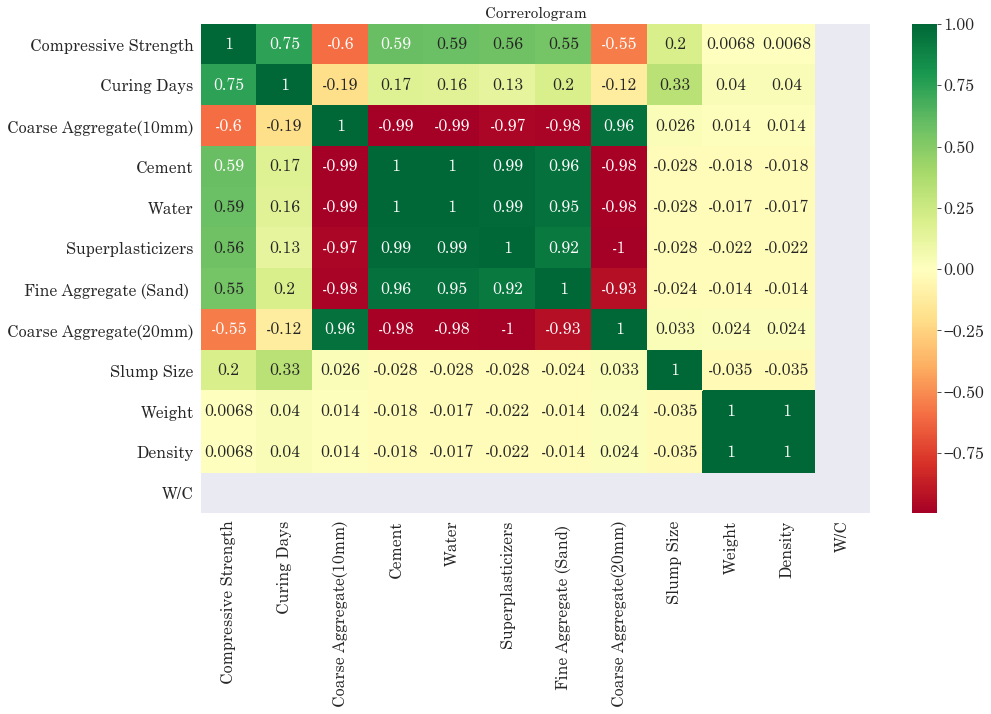

In [11]:
corr=df[list(correl.index)].corr()
plt.figure(figsize=(15,9))
_=sns.heatmap(corr, cmap='RdYlGn', annot=True)
_=plt.title("Correrologram", fontsize=15)

In [12]:
for col in df.columns.to_list():
    if df[col].dtypes in ["int64", "float64"]:
        print(f"The skewness of the {col} is {df[col].skew()}")

The skewness of the Cement is 2.7891414349824606
The skewness of the Water is 2.719656241642863
The skewness of the Superplasticizers is 2.3952039132791176
The skewness of the Coarse Aggregate(10mm) is -2.984978746185814
The skewness of the Coarse Aggregate(20mm) is -2.246894891220547
The skewness of the Fine Aggregate (Sand)  is 3.0233442616645005
The skewness of the W/C is 0
The skewness of the Slump Size is 2.979028056736298
The skewness of the Curing Days is 0.3311271263114081
The skewness of the Weight is 35.09806951786164
The skewness of the Density is 35.09806951786166
The skewness of the Compressive Strength is 1.3444738384976562


In [13]:
df["Compressive Strength"].skew()

1.3444738384976562

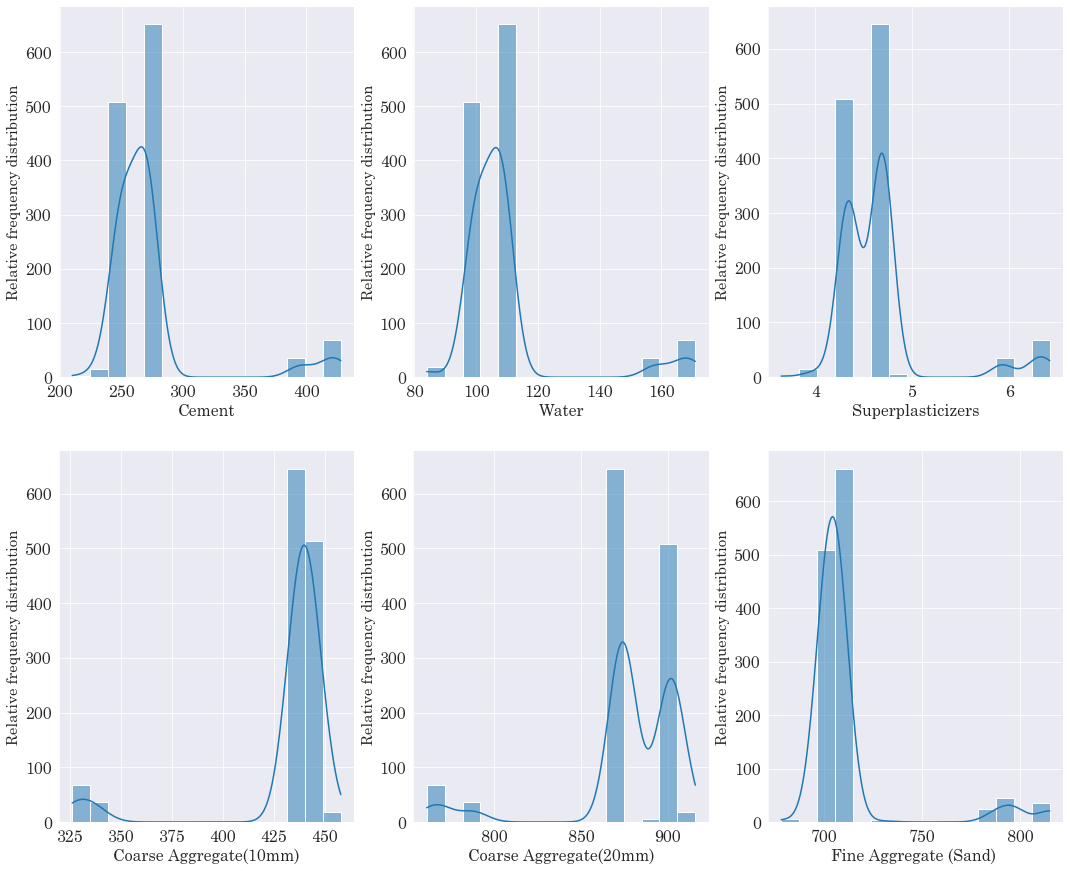

In [14]:
first_plot=df.iloc[:,:6]
fig, [(ax1,ax2,ax3),(ax4,ax5,ax6)]=plt.subplots(2,3,figsize=(18,15))
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
for col, ax in zip(first_plot, range(len(axes))):
    sns.histplot(df[col], ax=axes[ax], kde=True, bins=15)
    axes[ax].set_ylabel(f'Relative frequency distribution', fontsize=15)
    #axes[ax].set_title(f'Distribution of {col}', fontsize=15)
    sns.despine()

<AxesSubplot:ylabel='Compressive Strength'>

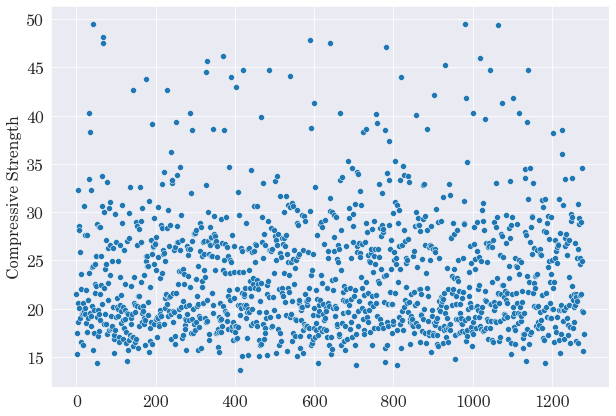

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df["Compressive Strength"])

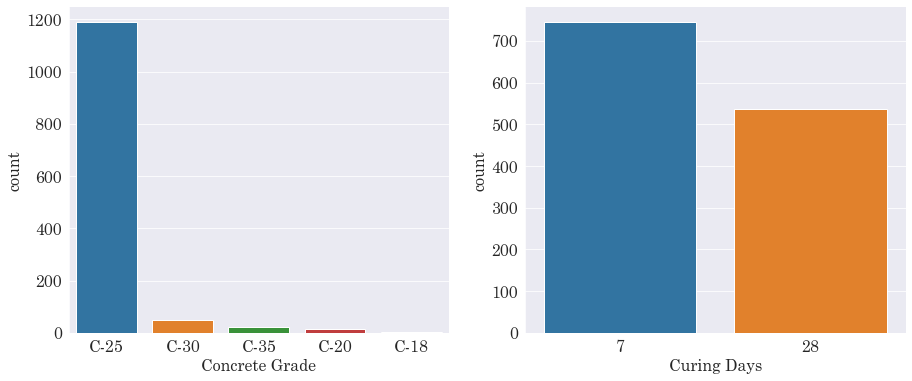

In [16]:
sec_plot=df.loc[:,["Concrete Grade","Curing Days"]]
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
axes=[ax1,ax2]
for col, ax in zip(sec_plot, range(len(axes))):
    sns.countplot(x=df[col], ax=axes[ax])
    #axes[ax].set_ylabel(f'Relative frequency distribution', fontsize="12")
    #axes[ax].set_title(f'Distribution of {col}')
    sns.despine()
    

<AxesSubplot:xlabel='Compressive Strength', ylabel='Count'>

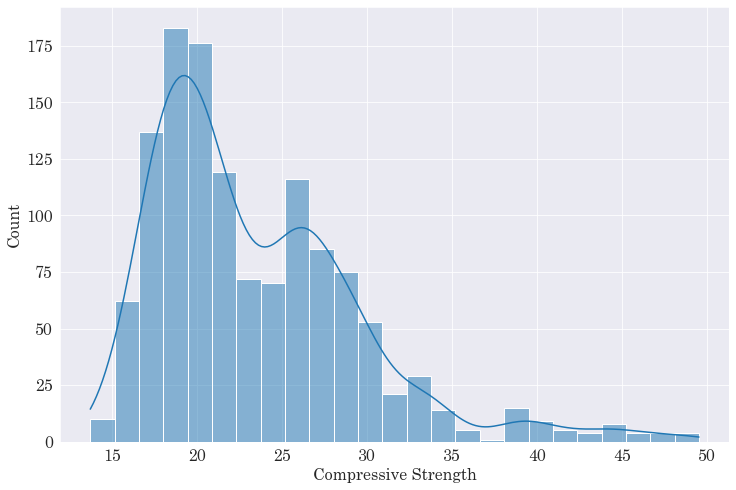

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(df["Compressive Strength"],kde=True)

<AxesSubplot:xlabel='Compressive Strength'>

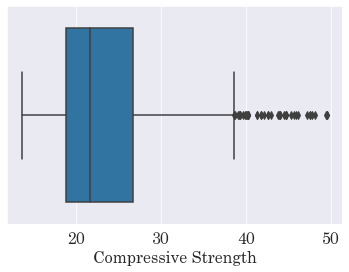

In [18]:
sns.boxplot(x=df["Compressive Strength"])

## Preprocessing

In [19]:
#Having a copy
train_df = df.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cement                  1281 non-null   int64  
 1   Water                   1281 non-null   int64  
 2   Superplasticizers       1281 non-null   float64
 3   Coarse Aggregate(10mm)  1281 non-null   int64  
 4   Coarse Aggregate(20mm)  1281 non-null   int64  
 5   Fine Aggregate (Sand)   1281 non-null   int64  
 6   W/C                     1281 non-null   float64
 7   Slump Size              292 non-null    float64
 8   Curing Days             1281 non-null   int64  
 9   Weight                  1281 non-null   float64
 10  Density                 1281 non-null   float64
 11  Concrete Grade          1281 non-null   object 
 12  Compressive Strength    1281 non-null   float64
dtypes: float64(6), int64(6), object(1)
memory usage: 130.2+ KB


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    ])

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
class process_data(BaseEstimator, TransformerMixin):
    def __init__(self,split_data):
        self.split_data = split_data
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.drop(['W/C', 'Slump Size'], axis=1)
        num = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
        cat = X.select_dtypes(include='object').columns.to_list()
        if self.split_data:
            split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
            for train_index, test_index in split.split(X, X["Concrete Grade"]):
                strat_train_set = X.loc[train_index]
                strat_test_set = X.loc[test_index]
            y_train, y_test = strat_train_set["Compressive Strength"], strat_test_set["Compressive Strength"]
            strat_train_set, strat_test_set = strat_train_set.drop('Compressive Strength', axis=1),\
                                                strat_test_set.drop('Compressive Strength', axis=1)
            num.remove('Compressive Strength')
            full_pipeline = ColumnTransformer([
                ('num_col', num_pipeline, num),
                ('cat_col', OneHotEncoder(), cat)
            ])
            return (full_pipeline.fit_transform(strat_train_set),\
                    full_pipeline.fit_transform(strat_test_set)),(y_train, y_test)
        else:
            full_pipeline = ColumnTransformer([
                ('num_col', num_pipeline, num),
                ('cat_col', OneHotEncoder(), cat)
            ])
            return full_pipeline.fit_transform(X)

In [24]:
import joblib
process = {
    'training':process_data(split_data=True),
    'input_data': process_data(split_data=False)
}
joblib.dump(process,'process_data.pkl')

['process_data.pkl']

In [25]:
data_processing = joblib.load('process_data.pkl')

In [26]:
#Transform and split the training set
X, y = data_processing['training'].fit_transform(X=train_df)
X_train, X_test = X
y_train, y_test = y

## MODEL BUILDING

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [28]:
models = {
    'Linear Regression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'SGD Regressor': SGDRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=SEED),
    'Random Forest': RandomForestRegressor(random_state=SEED),
    'XGBRegressor':XGBRegressor(random_state=SEED),
    'catboost': CatBoostRegressor(random_state=SEED),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=SEED),
    'GradientBoostingRegressor':GradientBoostingRegressor(random_state=SEED)
}

In [29]:
def models_eval(model, x, y):
    rmse_train, rmse_val,r2, model_name = [], [], [],[]
    for name, model in models.items():
        model_name.append(name) #Saving the name of model
        model.fit(x,y) #Fitting model on training set
        y_pred = model.predict(x) #Making prediction on already seen data
        rmse = np.sqrt(mean_squared_error(y, y_pred)) #Evaluation on training set
        rmse_train.append(rmse)
        r2score = r2_score(y, y_pred) #Computing R2_score
        r2.append(r2score)
        # CrossValidation...
        scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
        rmse_scores = np.sqrt(-scores)
        rmse_val.append(rmse_scores.mean())
    # Create DataFrame for the models and their RMSE values
    eval_df = pd.DataFrame({'RMSE_Train_set':rmse_train, 'RMSE_Val':rmse_val, 'R2_Score':r2},index=model_name)
    return eval_df

In [30]:
eval_df=models_eval(models, X_train, y_train)

Learning rate set to 0.040239
0:	learn: 5.8383708	total: 183ms	remaining: 3m 2s
1:	learn: 5.6657101	total: 185ms	remaining: 1m 32s
2:	learn: 5.4994462	total: 187ms	remaining: 1m 2s
3:	learn: 5.3414350	total: 190ms	remaining: 47.3s
4:	learn: 5.1875292	total: 192ms	remaining: 38.3s
5:	learn: 5.0393773	total: 194ms	remaining: 32.1s
6:	learn: 4.8999817	total: 196ms	remaining: 27.8s
7:	learn: 4.7699838	total: 199ms	remaining: 24.7s
8:	learn: 4.6412255	total: 200ms	remaining: 22.1s
9:	learn: 4.5215472	total: 203ms	remaining: 20.1s
10:	learn: 4.4027747	total: 204ms	remaining: 18.4s
11:	learn: 4.2948246	total: 206ms	remaining: 16.9s
12:	learn: 4.1900879	total: 208ms	remaining: 15.8s
13:	learn: 4.0929472	total: 210ms	remaining: 14.8s
14:	learn: 3.9937307	total: 213ms	remaining: 14s
15:	learn: 3.9068261	total: 214ms	remaining: 13.2s
16:	learn: 3.8231207	total: 216ms	remaining: 12.5s
17:	learn: 3.7453683	total: 219ms	remaining: 11.9s
18:	learn: 3.6713895	total: 220ms	remaining: 11.3s
19:	learn: 3

186:	learn: 2.2092266	total: 621ms	remaining: 2.7s
187:	learn: 2.2080513	total: 623ms	remaining: 2.69s
188:	learn: 2.2070471	total: 626ms	remaining: 2.69s
189:	learn: 2.2069477	total: 628ms	remaining: 2.68s
190:	learn: 2.2063496	total: 630ms	remaining: 2.67s
191:	learn: 2.2060162	total: 633ms	remaining: 2.66s
192:	learn: 2.2052376	total: 636ms	remaining: 2.66s
193:	learn: 2.2039287	total: 639ms	remaining: 2.65s
194:	learn: 2.2028406	total: 641ms	remaining: 2.65s
195:	learn: 2.2017400	total: 644ms	remaining: 2.64s
196:	learn: 2.2009272	total: 646ms	remaining: 2.63s
197:	learn: 2.2005854	total: 648ms	remaining: 2.62s
198:	learn: 2.2000029	total: 651ms	remaining: 2.62s
199:	learn: 2.1992511	total: 653ms	remaining: 2.61s
200:	learn: 2.1982045	total: 655ms	remaining: 2.6s
201:	learn: 2.1978021	total: 657ms	remaining: 2.6s
202:	learn: 2.1973717	total: 660ms	remaining: 2.59s
203:	learn: 2.1963555	total: 662ms	remaining: 2.58s
204:	learn: 2.1954561	total: 664ms	remaining: 2.58s
205:	learn: 2.1

363:	learn: 2.0748969	total: 1.11s	remaining: 1.94s
364:	learn: 2.0747366	total: 1.11s	remaining: 1.93s
365:	learn: 2.0745628	total: 1.11s	remaining: 1.93s
366:	learn: 2.0741729	total: 1.12s	remaining: 1.93s
367:	learn: 2.0737743	total: 1.12s	remaining: 1.92s
368:	learn: 2.0732302	total: 1.12s	remaining: 1.92s
369:	learn: 2.0723201	total: 1.13s	remaining: 1.92s
370:	learn: 2.0721862	total: 1.13s	remaining: 1.91s
371:	learn: 2.0718949	total: 1.13s	remaining: 1.91s
372:	learn: 2.0710380	total: 1.13s	remaining: 1.91s
373:	learn: 2.0708987	total: 1.14s	remaining: 1.9s
374:	learn: 2.0702454	total: 1.14s	remaining: 1.9s
375:	learn: 2.0698007	total: 1.14s	remaining: 1.89s
376:	learn: 2.0694719	total: 1.14s	remaining: 1.89s
377:	learn: 2.0693430	total: 1.15s	remaining: 1.89s
378:	learn: 2.0690246	total: 1.15s	remaining: 1.88s
379:	learn: 2.0688041	total: 1.15s	remaining: 1.88s
380:	learn: 2.0681020	total: 1.15s	remaining: 1.88s
381:	learn: 2.0673563	total: 1.16s	remaining: 1.87s
382:	learn: 2.

540:	learn: 1.9794946	total: 1.59s	remaining: 1.35s
541:	learn: 1.9794377	total: 1.6s	remaining: 1.35s
542:	learn: 1.9787764	total: 1.6s	remaining: 1.35s
543:	learn: 1.9783154	total: 1.6s	remaining: 1.34s
544:	learn: 1.9782436	total: 1.61s	remaining: 1.34s
545:	learn: 1.9779963	total: 1.61s	remaining: 1.34s
546:	learn: 1.9774977	total: 1.61s	remaining: 1.33s
547:	learn: 1.9771626	total: 1.61s	remaining: 1.33s
548:	learn: 1.9770409	total: 1.62s	remaining: 1.33s
549:	learn: 1.9767552	total: 1.62s	remaining: 1.32s
550:	learn: 1.9760697	total: 1.62s	remaining: 1.32s
551:	learn: 1.9758150	total: 1.62s	remaining: 1.32s
552:	learn: 1.9755796	total: 1.63s	remaining: 1.31s
553:	learn: 1.9753713	total: 1.63s	remaining: 1.31s
554:	learn: 1.9747082	total: 1.63s	remaining: 1.31s
555:	learn: 1.9740992	total: 1.64s	remaining: 1.3s
556:	learn: 1.9737508	total: 1.64s	remaining: 1.3s
557:	learn: 1.9731166	total: 1.64s	remaining: 1.3s
558:	learn: 1.9722939	total: 1.64s	remaining: 1.29s
559:	learn: 1.9720

724:	learn: 1.9060352	total: 2.09s	remaining: 791ms
725:	learn: 1.9055998	total: 2.09s	remaining: 788ms
726:	learn: 1.9052425	total: 2.09s	remaining: 785ms
727:	learn: 1.9050360	total: 2.09s	remaining: 783ms
728:	learn: 1.9042405	total: 2.1s	remaining: 779ms
729:	learn: 1.9038484	total: 2.1s	remaining: 776ms
730:	learn: 1.9031816	total: 2.1s	remaining: 773ms
731:	learn: 1.9030018	total: 2.1s	remaining: 770ms
732:	learn: 1.9023372	total: 2.11s	remaining: 767ms
733:	learn: 1.9019402	total: 2.11s	remaining: 765ms
734:	learn: 1.9012177	total: 2.11s	remaining: 761ms
735:	learn: 1.9007336	total: 2.11s	remaining: 759ms
736:	learn: 1.9004491	total: 2.12s	remaining: 756ms
737:	learn: 1.9002947	total: 2.12s	remaining: 753ms
738:	learn: 1.9001623	total: 2.12s	remaining: 750ms
739:	learn: 1.8997781	total: 2.13s	remaining: 747ms
740:	learn: 1.8994169	total: 2.13s	remaining: 744ms
741:	learn: 1.8989589	total: 2.13s	remaining: 741ms
742:	learn: 1.8984339	total: 2.13s	remaining: 738ms
743:	learn: 1.89

911:	learn: 1.8411758	total: 2.58s	remaining: 249ms
912:	learn: 1.8408952	total: 2.58s	remaining: 246ms
913:	learn: 1.8408202	total: 2.59s	remaining: 243ms
914:	learn: 1.8407032	total: 2.59s	remaining: 241ms
915:	learn: 1.8402093	total: 2.59s	remaining: 238ms
916:	learn: 1.8400526	total: 2.6s	remaining: 235ms
917:	learn: 1.8399061	total: 2.6s	remaining: 232ms
918:	learn: 1.8395890	total: 2.6s	remaining: 229ms
919:	learn: 1.8393900	total: 2.6s	remaining: 226ms
920:	learn: 1.8391437	total: 2.6s	remaining: 223ms
921:	learn: 1.8385817	total: 2.61s	remaining: 221ms
922:	learn: 1.8384556	total: 2.61s	remaining: 218ms
923:	learn: 1.8382343	total: 2.61s	remaining: 215ms
924:	learn: 1.8376911	total: 2.62s	remaining: 212ms
925:	learn: 1.8371943	total: 2.62s	remaining: 209ms
926:	learn: 1.8366906	total: 2.62s	remaining: 206ms
927:	learn: 1.8359519	total: 2.63s	remaining: 204ms
928:	learn: 1.8357511	total: 2.63s	remaining: 201ms
929:	learn: 1.8354950	total: 2.63s	remaining: 198ms
930:	learn: 1.835

74:	learn: 2.3764776	total: 161ms	remaining: 1.98s
75:	learn: 2.3711412	total: 164ms	remaining: 2s
76:	learn: 2.3658423	total: 167ms	remaining: 2s
77:	learn: 2.3599263	total: 170ms	remaining: 2s
78:	learn: 2.3568001	total: 171ms	remaining: 1.99s
79:	learn: 2.3509916	total: 174ms	remaining: 2s
80:	learn: 2.3472785	total: 177ms	remaining: 2s
81:	learn: 2.3426410	total: 179ms	remaining: 2.01s
82:	learn: 2.3382513	total: 182ms	remaining: 2s
83:	learn: 2.3353644	total: 184ms	remaining: 2s
84:	learn: 2.3325060	total: 185ms	remaining: 1.99s
85:	learn: 2.3282412	total: 188ms	remaining: 2s
86:	learn: 2.3255992	total: 191ms	remaining: 2s
87:	learn: 2.3232544	total: 193ms	remaining: 2s
88:	learn: 2.3197500	total: 195ms	remaining: 2s
89:	learn: 2.3158875	total: 198ms	remaining: 2s
90:	learn: 2.3126250	total: 200ms	remaining: 2s
91:	learn: 2.3112299	total: 202ms	remaining: 1.99s
92:	learn: 2.3088782	total: 204ms	remaining: 1.99s
93:	learn: 2.3072915	total: 205ms	remaining: 1.98s
94:	learn: 2.303970

273:	learn: 2.0487783	total: 645ms	remaining: 1.71s
274:	learn: 2.0474187	total: 648ms	remaining: 1.71s
275:	learn: 2.0466583	total: 650ms	remaining: 1.71s
276:	learn: 2.0461843	total: 653ms	remaining: 1.7s
277:	learn: 2.0457521	total: 655ms	remaining: 1.7s
278:	learn: 2.0446477	total: 658ms	remaining: 1.7s
279:	learn: 2.0433969	total: 660ms	remaining: 1.7s
280:	learn: 2.0422161	total: 663ms	remaining: 1.7s
281:	learn: 2.0417505	total: 666ms	remaining: 1.69s
282:	learn: 2.0413988	total: 669ms	remaining: 1.69s
283:	learn: 2.0409983	total: 671ms	remaining: 1.69s
284:	learn: 2.0406589	total: 674ms	remaining: 1.69s
285:	learn: 2.0387654	total: 677ms	remaining: 1.69s
286:	learn: 2.0384487	total: 680ms	remaining: 1.69s
287:	learn: 2.0381423	total: 683ms	remaining: 1.69s
288:	learn: 2.0376198	total: 686ms	remaining: 1.69s
289:	learn: 2.0364683	total: 689ms	remaining: 1.69s
290:	learn: 2.0352476	total: 691ms	remaining: 1.68s
291:	learn: 2.0341759	total: 695ms	remaining: 1.68s
292:	learn: 2.033

457:	learn: 1.9186423	total: 1.13s	remaining: 1.34s
458:	learn: 1.9177203	total: 1.13s	remaining: 1.34s
459:	learn: 1.9167938	total: 1.14s	remaining: 1.33s
460:	learn: 1.9160144	total: 1.14s	remaining: 1.33s
461:	learn: 1.9150075	total: 1.14s	remaining: 1.33s
462:	learn: 1.9142308	total: 1.14s	remaining: 1.33s
463:	learn: 1.9134224	total: 1.15s	remaining: 1.32s
464:	learn: 1.9132946	total: 1.15s	remaining: 1.32s
465:	learn: 1.9126963	total: 1.15s	remaining: 1.32s
466:	learn: 1.9120285	total: 1.16s	remaining: 1.32s
467:	learn: 1.9112657	total: 1.16s	remaining: 1.32s
468:	learn: 1.9109406	total: 1.16s	remaining: 1.31s
469:	learn: 1.9104472	total: 1.16s	remaining: 1.31s
470:	learn: 1.9100571	total: 1.16s	remaining: 1.31s
471:	learn: 1.9087688	total: 1.17s	remaining: 1.3s
472:	learn: 1.9082029	total: 1.17s	remaining: 1.3s
473:	learn: 1.9081678	total: 1.17s	remaining: 1.3s
474:	learn: 1.9067044	total: 1.17s	remaining: 1.3s
475:	learn: 1.9062435	total: 1.18s	remaining: 1.29s
476:	learn: 1.90

642:	learn: 1.8181147	total: 1.61s	remaining: 893ms
643:	learn: 1.8173594	total: 1.61s	remaining: 891ms
644:	learn: 1.8169733	total: 1.61s	remaining: 889ms
645:	learn: 1.8165803	total: 1.62s	remaining: 886ms
646:	learn: 1.8161928	total: 1.62s	remaining: 884ms
647:	learn: 1.8154837	total: 1.62s	remaining: 881ms
648:	learn: 1.8149864	total: 1.63s	remaining: 879ms
649:	learn: 1.8140805	total: 1.63s	remaining: 877ms
650:	learn: 1.8136746	total: 1.63s	remaining: 875ms
651:	learn: 1.8129969	total: 1.63s	remaining: 872ms
652:	learn: 1.8114811	total: 1.64s	remaining: 870ms
653:	learn: 1.8111577	total: 1.64s	remaining: 868ms
654:	learn: 1.8110664	total: 1.64s	remaining: 866ms
655:	learn: 1.8103719	total: 1.65s	remaining: 864ms
656:	learn: 1.8098153	total: 1.65s	remaining: 862ms
657:	learn: 1.8097029	total: 1.65s	remaining: 860ms
658:	learn: 1.8092106	total: 1.66s	remaining: 858ms
659:	learn: 1.8091726	total: 1.66s	remaining: 856ms
660:	learn: 1.8090081	total: 1.66s	remaining: 853ms
661:	learn: 

827:	learn: 1.7413031	total: 2.09s	remaining: 434ms
828:	learn: 1.7408781	total: 2.09s	remaining: 432ms
829:	learn: 1.7406282	total: 2.09s	remaining: 429ms
830:	learn: 1.7394817	total: 2.1s	remaining: 427ms
831:	learn: 1.7388990	total: 2.1s	remaining: 424ms
832:	learn: 1.7388364	total: 2.1s	remaining: 421ms
833:	learn: 1.7385665	total: 2.1s	remaining: 419ms
834:	learn: 1.7385263	total: 2.11s	remaining: 416ms
835:	learn: 1.7381771	total: 2.11s	remaining: 414ms
836:	learn: 1.7374480	total: 2.11s	remaining: 411ms
837:	learn: 1.7373033	total: 2.11s	remaining: 409ms
838:	learn: 1.7367430	total: 2.12s	remaining: 406ms
839:	learn: 1.7363599	total: 2.12s	remaining: 404ms
840:	learn: 1.7362308	total: 2.12s	remaining: 401ms
841:	learn: 1.7358223	total: 2.12s	remaining: 399ms
842:	learn: 1.7357114	total: 2.13s	remaining: 396ms
843:	learn: 1.7353902	total: 2.13s	remaining: 394ms
844:	learn: 1.7347221	total: 2.13s	remaining: 391ms
845:	learn: 1.7340328	total: 2.13s	remaining: 389ms
846:	learn: 1.73

Learning rate set to 0.037738
0:	learn: 5.9360886	total: 2.97ms	remaining: 2.96s
1:	learn: 5.7736175	total: 4.63ms	remaining: 2.31s
2:	learn: 5.6157468	total: 6.36ms	remaining: 2.11s
3:	learn: 5.4638679	total: 8.96ms	remaining: 2.23s
4:	learn: 5.3194436	total: 10.5ms	remaining: 2.1s
5:	learn: 5.1824417	total: 12.8ms	remaining: 2.13s
6:	learn: 5.0466746	total: 15.8ms	remaining: 2.23s
7:	learn: 4.9215044	total: 18ms	remaining: 2.24s
8:	learn: 4.7946872	total: 19.4ms	remaining: 2.13s
9:	learn: 4.6761715	total: 21.9ms	remaining: 2.17s
10:	learn: 4.5573613	total: 23.3ms	remaining: 2.1s
11:	learn: 4.4505599	total: 24.9ms	remaining: 2.05s
12:	learn: 4.3490933	total: 27.5ms	remaining: 2.08s
13:	learn: 4.2491701	total: 29.4ms	remaining: 2.07s
14:	learn: 4.1478292	total: 32ms	remaining: 2.1s
15:	learn: 4.0585512	total: 33.2ms	remaining: 2.04s
16:	learn: 3.9734625	total: 35.3ms	remaining: 2.04s
17:	learn: 3.8895256	total: 37.9ms	remaining: 2.07s
18:	learn: 3.8125527	total: 39.5ms	remaining: 2.04s

209:	learn: 2.1358286	total: 477ms	remaining: 1.79s
210:	learn: 2.1354793	total: 480ms	remaining: 1.79s
211:	learn: 2.1346750	total: 483ms	remaining: 1.8s
212:	learn: 2.1341526	total: 486ms	remaining: 1.8s
213:	learn: 2.1331366	total: 489ms	remaining: 1.79s
214:	learn: 2.1328688	total: 491ms	remaining: 1.79s
215:	learn: 2.1320652	total: 494ms	remaining: 1.79s
216:	learn: 2.1316445	total: 496ms	remaining: 1.79s
217:	learn: 2.1307429	total: 499ms	remaining: 1.79s
218:	learn: 2.1303624	total: 502ms	remaining: 1.79s
219:	learn: 2.1292655	total: 504ms	remaining: 1.79s
220:	learn: 2.1275763	total: 506ms	remaining: 1.78s
221:	learn: 2.1264852	total: 509ms	remaining: 1.78s
222:	learn: 2.1259535	total: 511ms	remaining: 1.78s
223:	learn: 2.1255734	total: 513ms	remaining: 1.78s
224:	learn: 2.1247630	total: 516ms	remaining: 1.78s
225:	learn: 2.1238017	total: 518ms	remaining: 1.77s
226:	learn: 2.1229396	total: 521ms	remaining: 1.77s
227:	learn: 2.1226211	total: 523ms	remaining: 1.77s
228:	learn: 2.

393:	learn: 1.9953394	total: 967ms	remaining: 1.49s
394:	learn: 1.9952319	total: 969ms	remaining: 1.48s
395:	learn: 1.9938851	total: 972ms	remaining: 1.48s
396:	learn: 1.9933668	total: 974ms	remaining: 1.48s
397:	learn: 1.9924704	total: 977ms	remaining: 1.48s
398:	learn: 1.9922082	total: 980ms	remaining: 1.48s
399:	learn: 1.9917695	total: 982ms	remaining: 1.47s
400:	learn: 1.9904411	total: 985ms	remaining: 1.47s
401:	learn: 1.9902389	total: 987ms	remaining: 1.47s
402:	learn: 1.9893164	total: 989ms	remaining: 1.47s
403:	learn: 1.9885628	total: 992ms	remaining: 1.46s
404:	learn: 1.9873942	total: 995ms	remaining: 1.46s
405:	learn: 1.9868037	total: 997ms	remaining: 1.46s
406:	learn: 1.9867030	total: 1000ms	remaining: 1.46s
407:	learn: 1.9851950	total: 1s	remaining: 1.45s
408:	learn: 1.9833144	total: 1s	remaining: 1.45s
409:	learn: 1.9832114	total: 1.01s	remaining: 1.45s
410:	learn: 1.9820965	total: 1.01s	remaining: 1.45s
411:	learn: 1.9809904	total: 1.01s	remaining: 1.44s
412:	learn: 1.979

571:	learn: 1.8780587	total: 1.43s	remaining: 1.07s
572:	learn: 1.8772274	total: 1.43s	remaining: 1.07s
573:	learn: 1.8769209	total: 1.43s	remaining: 1.06s
574:	learn: 1.8764546	total: 1.44s	remaining: 1.06s
575:	learn: 1.8757132	total: 1.44s	remaining: 1.06s
576:	learn: 1.8746847	total: 1.44s	remaining: 1.06s
577:	learn: 1.8740611	total: 1.44s	remaining: 1.05s
578:	learn: 1.8737175	total: 1.45s	remaining: 1.05s
579:	learn: 1.8730489	total: 1.45s	remaining: 1.05s
580:	learn: 1.8723019	total: 1.45s	remaining: 1.05s
581:	learn: 1.8712596	total: 1.45s	remaining: 1.04s
582:	learn: 1.8705400	total: 1.46s	remaining: 1.04s
583:	learn: 1.8703041	total: 1.46s	remaining: 1.04s
584:	learn: 1.8700420	total: 1.46s	remaining: 1.04s
585:	learn: 1.8698305	total: 1.46s	remaining: 1.03s
586:	learn: 1.8697309	total: 1.47s	remaining: 1.03s
587:	learn: 1.8696507	total: 1.47s	remaining: 1.03s
588:	learn: 1.8692106	total: 1.47s	remaining: 1.03s
589:	learn: 1.8686747	total: 1.47s	remaining: 1.02s
590:	learn: 

751:	learn: 1.7921594	total: 1.91s	remaining: 630ms
752:	learn: 1.7914053	total: 1.91s	remaining: 627ms
753:	learn: 1.7912871	total: 1.92s	remaining: 625ms
754:	learn: 1.7906676	total: 1.92s	remaining: 622ms
755:	learn: 1.7903757	total: 1.92s	remaining: 620ms
756:	learn: 1.7903261	total: 1.92s	remaining: 617ms
757:	learn: 1.7902636	total: 1.93s	remaining: 615ms
758:	learn: 1.7899790	total: 1.93s	remaining: 612ms
759:	learn: 1.7892799	total: 1.93s	remaining: 610ms
760:	learn: 1.7890061	total: 1.93s	remaining: 607ms
761:	learn: 1.7888389	total: 1.94s	remaining: 605ms
762:	learn: 1.7885438	total: 1.94s	remaining: 602ms
763:	learn: 1.7879008	total: 1.94s	remaining: 599ms
764:	learn: 1.7878499	total: 1.94s	remaining: 597ms
765:	learn: 1.7877970	total: 1.95s	remaining: 594ms
766:	learn: 1.7874025	total: 1.95s	remaining: 592ms
767:	learn: 1.7871456	total: 1.95s	remaining: 589ms
768:	learn: 1.7871159	total: 1.95s	remaining: 587ms
769:	learn: 1.7866021	total: 1.96s	remaining: 584ms
770:	learn: 

938:	learn: 1.7160509	total: 2.4s	remaining: 156ms
939:	learn: 1.7158894	total: 2.4s	remaining: 153ms
940:	learn: 1.7158491	total: 2.4s	remaining: 151ms
941:	learn: 1.7154644	total: 2.4s	remaining: 148ms
942:	learn: 1.7151516	total: 2.41s	remaining: 146ms
943:	learn: 1.7150374	total: 2.41s	remaining: 143ms
944:	learn: 1.7146129	total: 2.41s	remaining: 140ms
945:	learn: 1.7140924	total: 2.42s	remaining: 138ms
946:	learn: 1.7135239	total: 2.42s	remaining: 135ms
947:	learn: 1.7134661	total: 2.42s	remaining: 133ms
948:	learn: 1.7131905	total: 2.42s	remaining: 130ms
949:	learn: 1.7126523	total: 2.42s	remaining: 128ms
950:	learn: 1.7121058	total: 2.43s	remaining: 125ms
951:	learn: 1.7119723	total: 2.43s	remaining: 123ms
952:	learn: 1.7119533	total: 2.43s	remaining: 120ms
953:	learn: 1.7115922	total: 2.44s	remaining: 117ms
954:	learn: 1.7114209	total: 2.44s	remaining: 115ms
955:	learn: 1.7107771	total: 2.44s	remaining: 112ms
956:	learn: 1.7103163	total: 2.44s	remaining: 110ms
957:	learn: 1.70

135:	learn: 2.3842890	total: 319ms	remaining: 2.03s
136:	learn: 2.3831049	total: 322ms	remaining: 2.03s
137:	learn: 2.3828368	total: 324ms	remaining: 2.02s
138:	learn: 2.3816191	total: 327ms	remaining: 2.02s
139:	learn: 2.3805116	total: 329ms	remaining: 2.02s
140:	learn: 2.3792880	total: 332ms	remaining: 2.02s
141:	learn: 2.3779116	total: 334ms	remaining: 2.02s
142:	learn: 2.3764577	total: 336ms	remaining: 2.02s
143:	learn: 2.3753888	total: 338ms	remaining: 2.01s
144:	learn: 2.3738481	total: 341ms	remaining: 2.01s
145:	learn: 2.3726568	total: 343ms	remaining: 2.01s
146:	learn: 2.3705911	total: 346ms	remaining: 2.01s
147:	learn: 2.3695208	total: 348ms	remaining: 2.01s
148:	learn: 2.3676707	total: 351ms	remaining: 2s
149:	learn: 2.3659818	total: 354ms	remaining: 2s
150:	learn: 2.3645379	total: 356ms	remaining: 2s
151:	learn: 2.3632169	total: 359ms	remaining: 2s
152:	learn: 2.3618523	total: 361ms	remaining: 2s
153:	learn: 2.3614010	total: 362ms	remaining: 1.99s
154:	learn: 2.3605436	total

328:	learn: 2.1695566	total: 800ms	remaining: 1.63s
329:	learn: 2.1683859	total: 802ms	remaining: 1.63s
330:	learn: 2.1680547	total: 805ms	remaining: 1.63s
331:	learn: 2.1671000	total: 808ms	remaining: 1.62s
332:	learn: 2.1667850	total: 810ms	remaining: 1.62s
333:	learn: 2.1655104	total: 812ms	remaining: 1.62s
334:	learn: 2.1643567	total: 815ms	remaining: 1.62s
335:	learn: 2.1630968	total: 818ms	remaining: 1.62s
336:	learn: 2.1623640	total: 820ms	remaining: 1.61s
337:	learn: 2.1617161	total: 823ms	remaining: 1.61s
338:	learn: 2.1614095	total: 826ms	remaining: 1.61s
339:	learn: 2.1598494	total: 828ms	remaining: 1.61s
340:	learn: 2.1595852	total: 831ms	remaining: 1.6s
341:	learn: 2.1586235	total: 833ms	remaining: 1.6s
342:	learn: 2.1573355	total: 835ms	remaining: 1.6s
343:	learn: 2.1570398	total: 838ms	remaining: 1.6s
344:	learn: 2.1558703	total: 840ms	remaining: 1.59s
345:	learn: 2.1552900	total: 842ms	remaining: 1.59s
346:	learn: 2.1546469	total: 844ms	remaining: 1.59s
347:	learn: 2.15

512:	learn: 2.0450980	total: 1.29s	remaining: 1.22s
513:	learn: 2.0444875	total: 1.29s	remaining: 1.22s
514:	learn: 2.0436784	total: 1.29s	remaining: 1.22s
515:	learn: 2.0428415	total: 1.29s	remaining: 1.21s
516:	learn: 2.0422095	total: 1.3s	remaining: 1.21s
517:	learn: 2.0416540	total: 1.3s	remaining: 1.21s
518:	learn: 2.0410411	total: 1.3s	remaining: 1.21s
519:	learn: 2.0399210	total: 1.3s	remaining: 1.2s
520:	learn: 2.0390935	total: 1.31s	remaining: 1.2s
521:	learn: 2.0383853	total: 1.31s	remaining: 1.2s
522:	learn: 2.0376100	total: 1.31s	remaining: 1.2s
523:	learn: 2.0369321	total: 1.31s	remaining: 1.2s
524:	learn: 2.0367540	total: 1.32s	remaining: 1.19s
525:	learn: 2.0365565	total: 1.32s	remaining: 1.19s
526:	learn: 2.0358970	total: 1.32s	remaining: 1.19s
527:	learn: 2.0351943	total: 1.33s	remaining: 1.19s
528:	learn: 2.0339780	total: 1.33s	remaining: 1.18s
529:	learn: 2.0333664	total: 1.33s	remaining: 1.18s
530:	learn: 2.0323774	total: 1.33s	remaining: 1.18s
531:	learn: 2.0315560

700:	learn: 1.9446082	total: 1.77s	remaining: 755ms
701:	learn: 1.9441199	total: 1.77s	remaining: 752ms
702:	learn: 1.9436359	total: 1.77s	remaining: 750ms
703:	learn: 1.9431887	total: 1.78s	remaining: 747ms
704:	learn: 1.9426172	total: 1.78s	remaining: 745ms
705:	learn: 1.9421647	total: 1.78s	remaining: 742ms
706:	learn: 1.9414044	total: 1.78s	remaining: 740ms
707:	learn: 1.9410582	total: 1.79s	remaining: 737ms
708:	learn: 1.9404524	total: 1.79s	remaining: 734ms
709:	learn: 1.9403320	total: 1.79s	remaining: 732ms
710:	learn: 1.9402328	total: 1.79s	remaining: 729ms
711:	learn: 1.9398835	total: 1.8s	remaining: 727ms
712:	learn: 1.9392574	total: 1.8s	remaining: 724ms
713:	learn: 1.9391421	total: 1.8s	remaining: 721ms
714:	learn: 1.9390187	total: 1.8s	remaining: 719ms
715:	learn: 1.9387931	total: 1.81s	remaining: 717ms
716:	learn: 1.9386807	total: 1.81s	remaining: 714ms
717:	learn: 1.9384909	total: 1.81s	remaining: 711ms
718:	learn: 1.9380707	total: 1.81s	remaining: 709ms
719:	learn: 1.93

886:	learn: 1.8742686	total: 2.26s	remaining: 288ms
887:	learn: 1.8734915	total: 2.26s	remaining: 285ms
888:	learn: 1.8730000	total: 2.26s	remaining: 282ms
889:	learn: 1.8729777	total: 2.26s	remaining: 280ms
890:	learn: 1.8726280	total: 2.27s	remaining: 277ms
891:	learn: 1.8720776	total: 2.27s	remaining: 275ms
892:	learn: 1.8719956	total: 2.27s	remaining: 272ms
893:	learn: 1.8712214	total: 2.27s	remaining: 270ms
894:	learn: 1.8711523	total: 2.28s	remaining: 267ms
895:	learn: 1.8708636	total: 2.28s	remaining: 265ms
896:	learn: 1.8703931	total: 2.28s	remaining: 262ms
897:	learn: 1.8699701	total: 2.29s	remaining: 260ms
898:	learn: 1.8699289	total: 2.29s	remaining: 257ms
899:	learn: 1.8698899	total: 2.29s	remaining: 255ms
900:	learn: 1.8695804	total: 2.29s	remaining: 252ms
901:	learn: 1.8692903	total: 2.3s	remaining: 250ms
902:	learn: 1.8688679	total: 2.3s	remaining: 247ms
903:	learn: 1.8686708	total: 2.3s	remaining: 244ms
904:	learn: 1.8685998	total: 2.3s	remaining: 242ms
905:	learn: 1.86

In [31]:
eval_df = eval_df.sort_values(by=["RMSE_Val"])
eval_df.to_pickle('Model_evaluation.pkl')
pd.read_pickle('Model_evaluation.pkl')

,RMSE_Train_set,RMSE_Val,R2_Score
catboost,1.815973,2.452500,0.909073
GradientBoostingRegressor,2.071331,2.455483,0.881703
Ridge,2.504429,2.552962,0.827061
AdaBoostRegressor,2.567404,2.649092,0.818255
Random Forest,1.163401,2.657595,0.962681
Linear Regression,2.502091,2.676747,0.827384
XGBRegressor,1.118785,2.687447,0.965488
Decision Tree,0.763841,3.065136,0.983913
Lasso,3.049321,3.077095,0.743622
Elastic Net,3.329505,3.350053,0.694343


Gradient Boosting Regressor and Catboost are the two best performing models with the lowest error metrics and the highest r2 value. We can then proceed to fine-tuning the best model of the two so we can decide the best model to use.

## Fine-tuning the best models

**Selected best models:**

- GradientBoostingRegressor
- catboost

> **GradientBoostingRegressor**

In [32]:
gbr = GradientBoostingRegressor(max_depth = 7, learning_rate = 0.1, n_estimators = 1000, random_state =42)
scores = cross_val_score(gbr, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-scores)

In [33]:
print(f'RMSE:{rmse_scores.mean()}')

RMSE:2.903925066428114


> Catboost

In [34]:
cat = CatBoostRegressor(max_depth=7, learning_rate=0.1, n_estimators=1500, random_state=42)
scores = cross_val_score(cat, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
cat_rmse_scores = np.sqrt(-scores)

0:	learn: 5.6132644	total: 2.12ms	remaining: 3.18s
1:	learn: 5.2070469	total: 3.57ms	remaining: 2.67s
2:	learn: 4.8391491	total: 5.5ms	remaining: 2.74s
3:	learn: 4.5244137	total: 7.3ms	remaining: 2.73s
4:	learn: 4.2501480	total: 10.8ms	remaining: 3.22s
5:	learn: 4.0056643	total: 13.2ms	remaining: 3.29s
6:	learn: 3.7786008	total: 15ms	remaining: 3.2s
7:	learn: 3.5862913	total: 16.2ms	remaining: 3.02s
8:	learn: 3.4213339	total: 18ms	remaining: 2.98s
9:	learn: 3.2658086	total: 21.6ms	remaining: 3.22s
10:	learn: 3.1367276	total: 24.9ms	remaining: 3.37s
11:	learn: 3.0257392	total: 26.6ms	remaining: 3.3s
12:	learn: 2.9460375	total: 27.8ms	remaining: 3.18s
13:	learn: 2.8667339	total: 28.7ms	remaining: 3.05s
14:	learn: 2.7919713	total: 31.3ms	remaining: 3.09s
15:	learn: 2.7304492	total: 33.7ms	remaining: 3.13s
16:	learn: 2.6679098	total: 37ms	remaining: 3.23s
17:	learn: 2.6306685	total: 38.1ms	remaining: 3.14s
18:	learn: 2.5779458	total: 41.6ms	remaining: 3.24s
19:	learn: 2.5385446	total: 44.1

160:	learn: 1.8788442	total: 504ms	remaining: 4.19s
161:	learn: 1.8783679	total: 508ms	remaining: 4.19s
162:	learn: 1.8769200	total: 512ms	remaining: 4.2s
163:	learn: 1.8762629	total: 515ms	remaining: 4.2s
164:	learn: 1.8739721	total: 519ms	remaining: 4.2s
165:	learn: 1.8734417	total: 523ms	remaining: 4.2s
166:	learn: 1.8723708	total: 527ms	remaining: 4.21s
167:	learn: 1.8718768	total: 531ms	remaining: 4.21s
168:	learn: 1.8684123	total: 535ms	remaining: 4.21s
169:	learn: 1.8629077	total: 539ms	remaining: 4.22s
170:	learn: 1.8600974	total: 542ms	remaining: 4.21s
171:	learn: 1.8579631	total: 546ms	remaining: 4.21s
172:	learn: 1.8571318	total: 549ms	remaining: 4.21s
173:	learn: 1.8521780	total: 553ms	remaining: 4.22s
174:	learn: 1.8498661	total: 557ms	remaining: 4.22s
175:	learn: 1.8483193	total: 560ms	remaining: 4.21s
176:	learn: 1.8438778	total: 564ms	remaining: 4.21s
177:	learn: 1.8436302	total: 566ms	remaining: 4.21s
178:	learn: 1.8420160	total: 571ms	remaining: 4.21s
179:	learn: 1.84

345:	learn: 1.6172737	total: 1.17s	remaining: 3.9s
346:	learn: 1.6168907	total: 1.17s	remaining: 3.9s
347:	learn: 1.6150619	total: 1.18s	remaining: 3.89s
348:	learn: 1.6147044	total: 1.18s	remaining: 3.89s
349:	learn: 1.6126807	total: 1.18s	remaining: 3.89s
350:	learn: 1.6116722	total: 1.19s	remaining: 3.88s
351:	learn: 1.6094463	total: 1.19s	remaining: 3.88s
352:	learn: 1.6085269	total: 1.19s	remaining: 3.88s
353:	learn: 1.6084008	total: 1.2s	remaining: 3.88s
354:	learn: 1.6082855	total: 1.2s	remaining: 3.87s
355:	learn: 1.6079675	total: 1.2s	remaining: 3.87s
356:	learn: 1.6069017	total: 1.21s	remaining: 3.87s
357:	learn: 1.6061052	total: 1.21s	remaining: 3.86s
358:	learn: 1.6056185	total: 1.21s	remaining: 3.86s
359:	learn: 1.6029305	total: 1.22s	remaining: 3.86s
360:	learn: 1.6028667	total: 1.22s	remaining: 3.86s
361:	learn: 1.6011741	total: 1.23s	remaining: 3.86s
362:	learn: 1.5999999	total: 1.23s	remaining: 3.85s
363:	learn: 1.5997352	total: 1.23s	remaining: 3.85s
364:	learn: 1.598

530:	learn: 1.4598731	total: 1.84s	remaining: 3.36s
531:	learn: 1.4589877	total: 1.85s	remaining: 3.36s
532:	learn: 1.4583668	total: 1.85s	remaining: 3.36s
533:	learn: 1.4577630	total: 1.85s	remaining: 3.36s
534:	learn: 1.4574739	total: 1.86s	remaining: 3.35s
535:	learn: 1.4567714	total: 1.86s	remaining: 3.35s
536:	learn: 1.4561769	total: 1.87s	remaining: 3.35s
537:	learn: 1.4560122	total: 1.87s	remaining: 3.34s
538:	learn: 1.4557581	total: 1.87s	remaining: 3.34s
539:	learn: 1.4543442	total: 1.88s	remaining: 3.33s
540:	learn: 1.4540653	total: 1.88s	remaining: 3.33s
541:	learn: 1.4538827	total: 1.88s	remaining: 3.33s
542:	learn: 1.4536719	total: 1.89s	remaining: 3.33s
543:	learn: 1.4528436	total: 1.89s	remaining: 3.32s
544:	learn: 1.4513685	total: 1.89s	remaining: 3.32s
545:	learn: 1.4510538	total: 1.9s	remaining: 3.32s
546:	learn: 1.4504536	total: 1.9s	remaining: 3.31s
547:	learn: 1.4499123	total: 1.9s	remaining: 3.31s
548:	learn: 1.4496566	total: 1.91s	remaining: 3.31s
549:	learn: 1.4

717:	learn: 1.3607136	total: 2.51s	remaining: 2.73s
718:	learn: 1.3602627	total: 2.51s	remaining: 2.73s
719:	learn: 1.3598101	total: 2.52s	remaining: 2.73s
720:	learn: 1.3597986	total: 2.52s	remaining: 2.72s
721:	learn: 1.3597536	total: 2.52s	remaining: 2.72s
722:	learn: 1.3596261	total: 2.52s	remaining: 2.71s
723:	learn: 1.3591141	total: 2.53s	remaining: 2.71s
724:	learn: 1.3590045	total: 2.53s	remaining: 2.71s
725:	learn: 1.3576985	total: 2.54s	remaining: 2.7s
726:	learn: 1.3574249	total: 2.54s	remaining: 2.7s
727:	learn: 1.3569670	total: 2.54s	remaining: 2.7s
728:	learn: 1.3565320	total: 2.54s	remaining: 2.69s
729:	learn: 1.3554006	total: 2.55s	remaining: 2.69s
730:	learn: 1.3544905	total: 2.55s	remaining: 2.69s
731:	learn: 1.3542994	total: 2.56s	remaining: 2.68s
732:	learn: 1.3532377	total: 2.56s	remaining: 2.68s
733:	learn: 1.3532265	total: 2.56s	remaining: 2.67s
734:	learn: 1.3526477	total: 2.57s	remaining: 2.67s
735:	learn: 1.3523337	total: 2.57s	remaining: 2.67s
736:	learn: 1.3

900:	learn: 1.2749881	total: 3.19s	remaining: 2.12s
901:	learn: 1.2748991	total: 3.19s	remaining: 2.11s
902:	learn: 1.2747411	total: 3.19s	remaining: 2.11s
903:	learn: 1.2745503	total: 3.2s	remaining: 2.11s
904:	learn: 1.2743346	total: 3.2s	remaining: 2.1s
905:	learn: 1.2739509	total: 3.2s	remaining: 2.1s
906:	learn: 1.2727756	total: 3.21s	remaining: 2.1s
907:	learn: 1.2724823	total: 3.21s	remaining: 2.09s
908:	learn: 1.2718979	total: 3.21s	remaining: 2.09s
909:	learn: 1.2715252	total: 3.22s	remaining: 2.09s
910:	learn: 1.2708440	total: 3.22s	remaining: 2.08s
911:	learn: 1.2707589	total: 3.23s	remaining: 2.08s
912:	learn: 1.2703364	total: 3.23s	remaining: 2.08s
913:	learn: 1.2701908	total: 3.23s	remaining: 2.07s
914:	learn: 1.2693840	total: 3.23s	remaining: 2.07s
915:	learn: 1.2691075	total: 3.24s	remaining: 2.06s
916:	learn: 1.2686962	total: 3.24s	remaining: 2.06s
917:	learn: 1.2685446	total: 3.25s	remaining: 2.06s
918:	learn: 1.2681581	total: 3.25s	remaining: 2.05s
919:	learn: 1.2679

1085:	learn: 1.2139581	total: 3.85s	remaining: 1.47s
1086:	learn: 1.2138719	total: 3.86s	remaining: 1.47s
1087:	learn: 1.2136952	total: 3.86s	remaining: 1.46s
1088:	learn: 1.2131839	total: 3.86s	remaining: 1.46s
1089:	learn: 1.2130987	total: 3.87s	remaining: 1.45s
1090:	learn: 1.2124096	total: 3.87s	remaining: 1.45s
1091:	learn: 1.2118910	total: 3.88s	remaining: 1.45s
1092:	learn: 1.2112264	total: 3.88s	remaining: 1.44s
1093:	learn: 1.2110593	total: 3.88s	remaining: 1.44s
1094:	learn: 1.2107879	total: 3.89s	remaining: 1.44s
1095:	learn: 1.2107491	total: 3.89s	remaining: 1.43s
1096:	learn: 1.2106510	total: 3.89s	remaining: 1.43s
1097:	learn: 1.2106305	total: 3.9s	remaining: 1.43s
1098:	learn: 1.2104729	total: 3.9s	remaining: 1.42s
1099:	learn: 1.2101301	total: 3.9s	remaining: 1.42s
1100:	learn: 1.2095918	total: 3.91s	remaining: 1.42s
1101:	learn: 1.2092245	total: 3.91s	remaining: 1.41s
1102:	learn: 1.2090814	total: 3.92s	remaining: 1.41s
1103:	learn: 1.2087008	total: 3.92s	remaining: 1.

1276:	learn: 1.1659028	total: 4.52s	remaining: 790ms
1277:	learn: 1.1653651	total: 4.53s	remaining: 787ms
1278:	learn: 1.1652302	total: 4.53s	remaining: 783ms
1279:	learn: 1.1647747	total: 4.54s	remaining: 780ms
1280:	learn: 1.1643592	total: 4.54s	remaining: 776ms
1281:	learn: 1.1635655	total: 4.54s	remaining: 772ms
1282:	learn: 1.1634942	total: 4.55s	remaining: 769ms
1283:	learn: 1.1632636	total: 4.55s	remaining: 765ms
1284:	learn: 1.1632361	total: 4.55s	remaining: 762ms
1285:	learn: 1.1629061	total: 4.55s	remaining: 758ms
1286:	learn: 1.1628631	total: 4.56s	remaining: 755ms
1287:	learn: 1.1628028	total: 4.56s	remaining: 751ms
1288:	learn: 1.1627155	total: 4.57s	remaining: 748ms
1289:	learn: 1.1626738	total: 4.57s	remaining: 744ms
1290:	learn: 1.1625214	total: 4.57s	remaining: 740ms
1291:	learn: 1.1622532	total: 4.58s	remaining: 737ms
1292:	learn: 1.1618564	total: 4.58s	remaining: 733ms
1293:	learn: 1.1616788	total: 4.58s	remaining: 730ms
1294:	learn: 1.1613903	total: 4.59s	remaining:

1451:	learn: 1.1309973	total: 5.26s	remaining: 174ms
1452:	learn: 1.1309690	total: 5.27s	remaining: 170ms
1453:	learn: 1.1307796	total: 5.27s	remaining: 167ms
1454:	learn: 1.1307466	total: 5.27s	remaining: 163ms
1455:	learn: 1.1304140	total: 5.28s	remaining: 160ms
1456:	learn: 1.1301364	total: 5.28s	remaining: 156ms
1457:	learn: 1.1301155	total: 5.29s	remaining: 152ms
1458:	learn: 1.1301090	total: 5.29s	remaining: 149ms
1459:	learn: 1.1300964	total: 5.3s	remaining: 145ms
1460:	learn: 1.1300456	total: 5.31s	remaining: 142ms
1461:	learn: 1.1299092	total: 5.31s	remaining: 138ms
1462:	learn: 1.1292107	total: 5.31s	remaining: 134ms
1463:	learn: 1.1289010	total: 5.31s	remaining: 131ms
1464:	learn: 1.1284411	total: 5.32s	remaining: 127ms
1465:	learn: 1.1283782	total: 5.32s	remaining: 123ms
1466:	learn: 1.1281531	total: 5.32s	remaining: 120ms
1467:	learn: 1.1281257	total: 5.33s	remaining: 116ms
1468:	learn: 1.1280846	total: 5.33s	remaining: 112ms
1469:	learn: 1.1279785	total: 5.33s	remaining: 

122:	learn: 2.0254362	total: 708ms	remaining: 7.92s
123:	learn: 2.0193947	total: 713ms	remaining: 7.91s
124:	learn: 2.0160296	total: 718ms	remaining: 7.89s
125:	learn: 2.0150298	total: 723ms	remaining: 7.88s
126:	learn: 2.0113910	total: 728ms	remaining: 7.87s
127:	learn: 2.0094788	total: 743ms	remaining: 7.96s
128:	learn: 2.0090991	total: 748ms	remaining: 7.95s
129:	learn: 2.0037491	total: 752ms	remaining: 7.93s
130:	learn: 2.0013451	total: 757ms	remaining: 7.91s
131:	learn: 2.0006504	total: 762ms	remaining: 7.9s
132:	learn: 1.9976428	total: 767ms	remaining: 7.88s
133:	learn: 1.9957728	total: 772ms	remaining: 7.87s
134:	learn: 1.9922337	total: 824ms	remaining: 8.33s
135:	learn: 1.9917002	total: 829ms	remaining: 8.31s
136:	learn: 1.9902855	total: 862ms	remaining: 8.57s
137:	learn: 1.9893021	total: 867ms	remaining: 8.56s
138:	learn: 1.9885893	total: 873ms	remaining: 8.54s
139:	learn: 1.9882025	total: 878ms	remaining: 8.53s
140:	learn: 1.9842981	total: 885ms	remaining: 8.53s
141:	learn: 1

296:	learn: 1.7338856	total: 1.73s	remaining: 7s
297:	learn: 1.7324252	total: 1.73s	remaining: 6.99s
298:	learn: 1.7321832	total: 1.74s	remaining: 6.97s
299:	learn: 1.7321178	total: 1.74s	remaining: 6.96s
300:	learn: 1.7302187	total: 1.74s	remaining: 6.94s
301:	learn: 1.7271279	total: 1.75s	remaining: 6.92s
302:	learn: 1.7258711	total: 1.75s	remaining: 6.91s
303:	learn: 1.7257540	total: 1.75s	remaining: 6.89s
304:	learn: 1.7244719	total: 1.75s	remaining: 6.87s
305:	learn: 1.7235863	total: 1.76s	remaining: 6.86s
306:	learn: 1.7224370	total: 1.76s	remaining: 6.85s
307:	learn: 1.7210668	total: 1.77s	remaining: 6.84s
308:	learn: 1.7201174	total: 1.77s	remaining: 6.83s
309:	learn: 1.7179735	total: 1.77s	remaining: 6.82s
310:	learn: 1.7164079	total: 1.78s	remaining: 6.79s
311:	learn: 1.7144224	total: 1.78s	remaining: 6.78s
312:	learn: 1.7128660	total: 1.78s	remaining: 6.76s
313:	learn: 1.7119130	total: 1.78s	remaining: 6.74s
314:	learn: 1.7115247	total: 1.79s	remaining: 6.73s
315:	learn: 1.7

477:	learn: 1.5482018	total: 2.4s	remaining: 5.13s
478:	learn: 1.5481150	total: 2.4s	remaining: 5.13s
479:	learn: 1.5478761	total: 2.41s	remaining: 5.12s
480:	learn: 1.5472443	total: 2.41s	remaining: 5.11s
481:	learn: 1.5459747	total: 2.42s	remaining: 5.1s
482:	learn: 1.5456101	total: 2.42s	remaining: 5.09s
483:	learn: 1.5455568	total: 2.42s	remaining: 5.08s
484:	learn: 1.5437760	total: 2.43s	remaining: 5.08s
485:	learn: 1.5429787	total: 2.43s	remaining: 5.07s
486:	learn: 1.5426620	total: 2.43s	remaining: 5.06s
487:	learn: 1.5417102	total: 2.44s	remaining: 5.05s
488:	learn: 1.5402799	total: 2.44s	remaining: 5.04s
489:	learn: 1.5393509	total: 2.44s	remaining: 5.04s
490:	learn: 1.5389671	total: 2.45s	remaining: 5.03s
491:	learn: 1.5381658	total: 2.45s	remaining: 5.02s
492:	learn: 1.5373676	total: 2.45s	remaining: 5.01s
493:	learn: 1.5368961	total: 2.46s	remaining: 5s
494:	learn: 1.5361994	total: 2.46s	remaining: 5s
495:	learn: 1.5354461	total: 2.46s	remaining: 4.99s
496:	learn: 1.5343582

654:	learn: 1.4228936	total: 3.09s	remaining: 3.99s
655:	learn: 1.4223389	total: 3.1s	remaining: 3.98s
656:	learn: 1.4217367	total: 3.1s	remaining: 3.98s
657:	learn: 1.4213049	total: 3.1s	remaining: 3.97s
658:	learn: 1.4202001	total: 3.11s	remaining: 3.97s
659:	learn: 1.4196631	total: 3.11s	remaining: 3.96s
660:	learn: 1.4186595	total: 3.12s	remaining: 3.96s
661:	learn: 1.4184516	total: 3.12s	remaining: 3.95s
662:	learn: 1.4176476	total: 3.13s	remaining: 3.95s
663:	learn: 1.4168228	total: 3.13s	remaining: 3.94s
664:	learn: 1.4157082	total: 3.13s	remaining: 3.94s
665:	learn: 1.4156460	total: 3.14s	remaining: 3.93s
666:	learn: 1.4154564	total: 3.14s	remaining: 3.93s
667:	learn: 1.4152297	total: 3.15s	remaining: 3.92s
668:	learn: 1.4129252	total: 3.15s	remaining: 3.92s
669:	learn: 1.4120726	total: 3.16s	remaining: 3.91s
670:	learn: 1.4109257	total: 3.16s	remaining: 3.91s
671:	learn: 1.4106688	total: 3.17s	remaining: 3.9s
672:	learn: 1.4101404	total: 3.17s	remaining: 3.9s
673:	learn: 1.410

842:	learn: 1.3288941	total: 3.94s	remaining: 3.07s
843:	learn: 1.3286260	total: 3.95s	remaining: 3.07s
844:	learn: 1.3276697	total: 3.95s	remaining: 3.06s
845:	learn: 1.3274748	total: 3.96s	remaining: 3.06s
846:	learn: 1.3272609	total: 3.96s	remaining: 3.05s
847:	learn: 1.3270613	total: 3.96s	remaining: 3.05s
848:	learn: 1.3269031	total: 3.97s	remaining: 3.04s
849:	learn: 1.3262687	total: 3.97s	remaining: 3.04s
850:	learn: 1.3258823	total: 3.98s	remaining: 3.03s
851:	learn: 1.3256561	total: 3.98s	remaining: 3.03s
852:	learn: 1.3251376	total: 3.99s	remaining: 3.02s
853:	learn: 1.3250470	total: 3.99s	remaining: 3.02s
854:	learn: 1.3244516	total: 4s	remaining: 3.01s
855:	learn: 1.3242034	total: 4s	remaining: 3.01s
856:	learn: 1.3230839	total: 4s	remaining: 3s
857:	learn: 1.3221912	total: 4.01s	remaining: 3s
858:	learn: 1.3219377	total: 4.01s	remaining: 2.99s
859:	learn: 1.3218173	total: 4.02s	remaining: 2.99s
860:	learn: 1.3204896	total: 4.02s	remaining: 2.98s
861:	learn: 1.3204600	total

1012:	learn: 1.2671971	total: 4.64s	remaining: 2.23s
1013:	learn: 1.2670452	total: 4.64s	remaining: 2.23s
1014:	learn: 1.2669478	total: 4.65s	remaining: 2.22s
1015:	learn: 1.2665865	total: 4.65s	remaining: 2.22s
1016:	learn: 1.2659421	total: 4.66s	remaining: 2.21s
1017:	learn: 1.2643658	total: 4.66s	remaining: 2.21s
1018:	learn: 1.2641788	total: 4.66s	remaining: 2.2s
1019:	learn: 1.2641628	total: 4.67s	remaining: 2.2s
1020:	learn: 1.2638902	total: 4.67s	remaining: 2.19s
1021:	learn: 1.2637779	total: 4.68s	remaining: 2.19s
1022:	learn: 1.2637628	total: 4.68s	remaining: 2.18s
1023:	learn: 1.2635780	total: 4.68s	remaining: 2.18s
1024:	learn: 1.2632601	total: 4.69s	remaining: 2.17s
1025:	learn: 1.2623575	total: 4.69s	remaining: 2.17s
1026:	learn: 1.2622234	total: 4.7s	remaining: 2.16s
1027:	learn: 1.2612757	total: 4.7s	remaining: 2.16s
1028:	learn: 1.2608796	total: 4.7s	remaining: 2.15s
1029:	learn: 1.2597403	total: 4.71s	remaining: 2.15s
1030:	learn: 1.2595485	total: 4.71s	remaining: 2.14

1173:	learn: 1.2215292	total: 5.32s	remaining: 1.48s
1174:	learn: 1.2213531	total: 5.32s	remaining: 1.47s
1175:	learn: 1.2211312	total: 5.33s	remaining: 1.47s
1176:	learn: 1.2209784	total: 5.33s	remaining: 1.46s
1177:	learn: 1.2206809	total: 5.34s	remaining: 1.46s
1178:	learn: 1.2206258	total: 5.34s	remaining: 1.45s
1179:	learn: 1.2205319	total: 5.34s	remaining: 1.45s
1180:	learn: 1.2204419	total: 5.35s	remaining: 1.44s
1181:	learn: 1.2201581	total: 5.35s	remaining: 1.44s
1182:	learn: 1.2200849	total: 5.36s	remaining: 1.44s
1183:	learn: 1.2199665	total: 5.36s	remaining: 1.43s
1184:	learn: 1.2196626	total: 5.36s	remaining: 1.43s
1185:	learn: 1.2187602	total: 5.37s	remaining: 1.42s
1186:	learn: 1.2184753	total: 5.37s	remaining: 1.42s
1187:	learn: 1.2180605	total: 5.38s	remaining: 1.41s
1188:	learn: 1.2179893	total: 5.38s	remaining: 1.41s
1189:	learn: 1.2177749	total: 5.39s	remaining: 1.4s
1190:	learn: 1.2177546	total: 5.39s	remaining: 1.4s
1191:	learn: 1.2177133	total: 5.39s	remaining: 1

1331:	learn: 1.1871948	total: 6s	remaining: 756ms
1332:	learn: 1.1871491	total: 6s	remaining: 752ms
1333:	learn: 1.1871370	total: 6s	remaining: 747ms
1334:	learn: 1.1869954	total: 6.01s	remaining: 743ms
1335:	learn: 1.1869210	total: 6.01s	remaining: 738ms
1336:	learn: 1.1868776	total: 6.01s	remaining: 733ms
1337:	learn: 1.1868353	total: 6.02s	remaining: 729ms
1338:	learn: 1.1867307	total: 6.02s	remaining: 724ms
1339:	learn: 1.1862656	total: 6.03s	remaining: 719ms
1340:	learn: 1.1857413	total: 6.03s	remaining: 715ms
1341:	learn: 1.1855979	total: 6.03s	remaining: 710ms
1342:	learn: 1.1854564	total: 6.04s	remaining: 706ms
1343:	learn: 1.1852473	total: 6.04s	remaining: 701ms
1344:	learn: 1.1851550	total: 6.04s	remaining: 697ms
1345:	learn: 1.1850873	total: 6.05s	remaining: 692ms
1346:	learn: 1.1849697	total: 6.05s	remaining: 688ms
1347:	learn: 1.1848265	total: 6.06s	remaining: 683ms
1348:	learn: 1.1846683	total: 6.06s	remaining: 678ms
1349:	learn: 1.1845349	total: 6.06s	remaining: 674ms
13

0:	learn: 5.4477058	total: 2.69ms	remaining: 4.03s
1:	learn: 5.0647037	total: 3.78ms	remaining: 2.83s
2:	learn: 4.7231584	total: 5.66ms	remaining: 2.83s
3:	learn: 4.4468557	total: 9.31ms	remaining: 3.48s
4:	learn: 4.1764558	total: 10.9ms	remaining: 3.26s
5:	learn: 3.9451034	total: 14.4ms	remaining: 3.6s
6:	learn: 3.7504199	total: 16ms	remaining: 3.4s
7:	learn: 3.5791112	total: 18.6ms	remaining: 3.47s
8:	learn: 3.4185750	total: 20.4ms	remaining: 3.38s
9:	learn: 3.2849851	total: 24.4ms	remaining: 3.63s
10:	learn: 3.1633316	total: 26.9ms	remaining: 3.63s
11:	learn: 3.0671812	total: 30.4ms	remaining: 3.77s
12:	learn: 2.9841744	total: 32.5ms	remaining: 3.72s
13:	learn: 2.9044590	total: 36.9ms	remaining: 3.92s
14:	learn: 2.8336735	total: 40.3ms	remaining: 3.99s
15:	learn: 2.7797922	total: 42ms	remaining: 3.89s
16:	learn: 2.7341621	total: 44.2ms	remaining: 3.85s
17:	learn: 2.6940199	total: 47.8ms	remaining: 3.93s
18:	learn: 2.6587060	total: 51.5ms	remaining: 4.02s
19:	learn: 2.6236050	total: 

198:	learn: 1.9716774	total: 673ms	remaining: 4.4s
199:	learn: 1.9713242	total: 678ms	remaining: 4.41s
200:	learn: 1.9690074	total: 684ms	remaining: 4.42s
201:	learn: 1.9679346	total: 690ms	remaining: 4.43s
202:	learn: 1.9641709	total: 694ms	remaining: 4.43s
203:	learn: 1.9637415	total: 698ms	remaining: 4.43s
204:	learn: 1.9632208	total: 701ms	remaining: 4.43s
205:	learn: 1.9610134	total: 705ms	remaining: 4.43s
206:	learn: 1.9584796	total: 708ms	remaining: 4.42s
207:	learn: 1.9576613	total: 713ms	remaining: 4.43s
208:	learn: 1.9567814	total: 716ms	remaining: 4.42s
209:	learn: 1.9545368	total: 719ms	remaining: 4.42s
210:	learn: 1.9528630	total: 723ms	remaining: 4.42s
211:	learn: 1.9512643	total: 726ms	remaining: 4.41s
212:	learn: 1.9492122	total: 730ms	remaining: 4.41s
213:	learn: 1.9457881	total: 734ms	remaining: 4.41s
214:	learn: 1.9437330	total: 737ms	remaining: 4.41s
215:	learn: 1.9417265	total: 741ms	remaining: 4.41s
216:	learn: 1.9407161	total: 744ms	remaining: 4.4s
217:	learn: 1.

384:	learn: 1.7641416	total: 1.34s	remaining: 3.88s
385:	learn: 1.7633273	total: 1.34s	remaining: 3.88s
386:	learn: 1.7630499	total: 1.35s	remaining: 3.88s
387:	learn: 1.7623504	total: 1.35s	remaining: 3.88s
388:	learn: 1.7622009	total: 1.36s	remaining: 3.87s
389:	learn: 1.7610686	total: 1.36s	remaining: 3.87s
390:	learn: 1.7603761	total: 1.36s	remaining: 3.87s
391:	learn: 1.7596259	total: 1.37s	remaining: 3.86s
392:	learn: 1.7593711	total: 1.37s	remaining: 3.86s
393:	learn: 1.7570594	total: 1.37s	remaining: 3.86s
394:	learn: 1.7567123	total: 1.38s	remaining: 3.85s
395:	learn: 1.7554245	total: 1.38s	remaining: 3.85s
396:	learn: 1.7540465	total: 1.38s	remaining: 3.85s
397:	learn: 1.7539241	total: 1.39s	remaining: 3.84s
398:	learn: 1.7530592	total: 1.39s	remaining: 3.84s
399:	learn: 1.7521746	total: 1.4s	remaining: 3.84s
400:	learn: 1.7519715	total: 1.4s	remaining: 3.83s
401:	learn: 1.7502995	total: 1.4s	remaining: 3.83s
402:	learn: 1.7502138	total: 1.41s	remaining: 3.83s
403:	learn: 1.7

570:	learn: 1.6224845	total: 2.02s	remaining: 3.29s
571:	learn: 1.6217340	total: 2.02s	remaining: 3.29s
572:	learn: 1.6205017	total: 2.03s	remaining: 3.28s
573:	learn: 1.6202802	total: 2.03s	remaining: 3.28s
574:	learn: 1.6199159	total: 2.04s	remaining: 3.28s
575:	learn: 1.6198942	total: 2.04s	remaining: 3.27s
576:	learn: 1.6194157	total: 2.04s	remaining: 3.27s
577:	learn: 1.6191561	total: 2.04s	remaining: 3.26s
578:	learn: 1.6174166	total: 2.05s	remaining: 3.26s
579:	learn: 1.6169097	total: 2.05s	remaining: 3.26s
580:	learn: 1.6165776	total: 2.06s	remaining: 3.25s
581:	learn: 1.6161087	total: 2.06s	remaining: 3.25s
582:	learn: 1.6161007	total: 2.06s	remaining: 3.25s
583:	learn: 1.6158846	total: 2.07s	remaining: 3.24s
584:	learn: 1.6155264	total: 2.07s	remaining: 3.24s
585:	learn: 1.6154096	total: 2.07s	remaining: 3.23s
586:	learn: 1.6149762	total: 2.08s	remaining: 3.23s
587:	learn: 1.6140253	total: 2.08s	remaining: 3.23s
588:	learn: 1.6129303	total: 2.08s	remaining: 3.22s
589:	learn: 

740:	learn: 1.5307989	total: 2.7s	remaining: 2.76s
741:	learn: 1.5303350	total: 2.7s	remaining: 2.76s
742:	learn: 1.5299756	total: 2.7s	remaining: 2.75s
743:	learn: 1.5292278	total: 2.71s	remaining: 2.75s
744:	learn: 1.5275904	total: 2.71s	remaining: 2.75s
745:	learn: 1.5273766	total: 2.71s	remaining: 2.74s
746:	learn: 1.5265952	total: 2.72s	remaining: 2.74s
747:	learn: 1.5264267	total: 2.72s	remaining: 2.74s
748:	learn: 1.5261202	total: 2.73s	remaining: 2.73s
749:	learn: 1.5252365	total: 2.73s	remaining: 2.73s
750:	learn: 1.5251867	total: 2.73s	remaining: 2.73s
751:	learn: 1.5247653	total: 2.74s	remaining: 2.72s
752:	learn: 1.5239886	total: 2.74s	remaining: 2.72s
753:	learn: 1.5236467	total: 2.74s	remaining: 2.71s
754:	learn: 1.5235691	total: 2.75s	remaining: 2.71s
755:	learn: 1.5233096	total: 2.75s	remaining: 2.71s
756:	learn: 1.5230862	total: 2.75s	remaining: 2.7s
757:	learn: 1.5226993	total: 2.76s	remaining: 2.7s
758:	learn: 1.5226530	total: 2.76s	remaining: 2.7s
759:	learn: 1.5219

926:	learn: 1.4547183	total: 3.37s	remaining: 2.08s
927:	learn: 1.4546692	total: 3.38s	remaining: 2.08s
928:	learn: 1.4536793	total: 3.38s	remaining: 2.08s
929:	learn: 1.4536059	total: 3.38s	remaining: 2.08s
930:	learn: 1.4534445	total: 3.39s	remaining: 2.07s
931:	learn: 1.4526436	total: 3.39s	remaining: 2.07s
932:	learn: 1.4523686	total: 3.4s	remaining: 2.06s
933:	learn: 1.4521121	total: 3.4s	remaining: 2.06s
934:	learn: 1.4518669	total: 3.4s	remaining: 2.06s
935:	learn: 1.4514376	total: 3.41s	remaining: 2.05s
936:	learn: 1.4513744	total: 3.41s	remaining: 2.05s
937:	learn: 1.4512673	total: 3.41s	remaining: 2.04s
938:	learn: 1.4508434	total: 3.42s	remaining: 2.04s
939:	learn: 1.4503206	total: 3.42s	remaining: 2.04s
940:	learn: 1.4499104	total: 3.42s	remaining: 2.03s
941:	learn: 1.4493738	total: 3.43s	remaining: 2.03s
942:	learn: 1.4489177	total: 3.43s	remaining: 2.03s
943:	learn: 1.4480351	total: 3.43s	remaining: 2.02s
944:	learn: 1.4477682	total: 3.44s	remaining: 2.02s
945:	learn: 1.4

1101:	learn: 1.4049475	total: 4.05s	remaining: 1.46s
1102:	learn: 1.4047858	total: 4.05s	remaining: 1.46s
1103:	learn: 1.4046434	total: 4.05s	remaining: 1.45s
1104:	learn: 1.4046182	total: 4.06s	remaining: 1.45s
1105:	learn: 1.4044192	total: 4.06s	remaining: 1.45s
1106:	learn: 1.4043934	total: 4.07s	remaining: 1.44s
1107:	learn: 1.4042601	total: 4.07s	remaining: 1.44s
1108:	learn: 1.4040086	total: 4.07s	remaining: 1.44s
1109:	learn: 1.4039639	total: 4.08s	remaining: 1.43s
1110:	learn: 1.4031246	total: 4.08s	remaining: 1.43s
1111:	learn: 1.4030478	total: 4.08s	remaining: 1.43s
1112:	learn: 1.4029791	total: 4.09s	remaining: 1.42s
1113:	learn: 1.4028152	total: 4.09s	remaining: 1.42s
1114:	learn: 1.4023560	total: 4.09s	remaining: 1.41s
1115:	learn: 1.4017390	total: 4.1s	remaining: 1.41s
1116:	learn: 1.4012640	total: 4.1s	remaining: 1.41s
1117:	learn: 1.4008245	total: 4.11s	remaining: 1.4s
1118:	learn: 1.3995503	total: 4.11s	remaining: 1.4s
1119:	learn: 1.3990744	total: 4.11s	remaining: 1.4

1284:	learn: 1.3588194	total: 4.72s	remaining: 790ms
1285:	learn: 1.3584186	total: 4.72s	remaining: 786ms
1286:	learn: 1.3581921	total: 4.73s	remaining: 783ms
1287:	learn: 1.3581715	total: 4.73s	remaining: 779ms
1288:	learn: 1.3578927	total: 4.74s	remaining: 775ms
1289:	learn: 1.3578535	total: 4.74s	remaining: 772ms
1290:	learn: 1.3577346	total: 4.74s	remaining: 768ms
1291:	learn: 1.3576775	total: 4.75s	remaining: 764ms
1292:	learn: 1.3575627	total: 4.75s	remaining: 761ms
1293:	learn: 1.3574942	total: 4.75s	remaining: 757ms
1294:	learn: 1.3571784	total: 4.76s	remaining: 753ms
1295:	learn: 1.3569657	total: 4.76s	remaining: 749ms
1296:	learn: 1.3567898	total: 4.76s	remaining: 746ms
1297:	learn: 1.3564124	total: 4.77s	remaining: 742ms
1298:	learn: 1.3560496	total: 4.77s	remaining: 739ms
1299:	learn: 1.3559696	total: 4.78s	remaining: 735ms
1300:	learn: 1.3559232	total: 4.78s	remaining: 731ms
1301:	learn: 1.3558645	total: 4.78s	remaining: 727ms
1302:	learn: 1.3552383	total: 4.79s	remaining:

1468:	learn: 1.3260893	total: 5.39s	remaining: 114ms
1469:	learn: 1.3260477	total: 5.39s	remaining: 110ms
1470:	learn: 1.3260199	total: 5.39s	remaining: 106ms
1471:	learn: 1.3258949	total: 5.4s	remaining: 103ms
1472:	learn: 1.3256002	total: 5.4s	remaining: 99ms
1473:	learn: 1.3254481	total: 5.41s	remaining: 95.3ms
1474:	learn: 1.3252898	total: 5.41s	remaining: 91.7ms
1475:	learn: 1.3252582	total: 5.41s	remaining: 88ms
1476:	learn: 1.3247402	total: 5.42s	remaining: 84.3ms
1477:	learn: 1.3246253	total: 5.42s	remaining: 80.7ms
1478:	learn: 1.3240865	total: 5.42s	remaining: 77ms
1479:	learn: 1.3237792	total: 5.43s	remaining: 73.3ms
1480:	learn: 1.3237323	total: 5.43s	remaining: 69.7ms
1481:	learn: 1.3236777	total: 5.43s	remaining: 66ms
1482:	learn: 1.3232698	total: 5.44s	remaining: 62.3ms
1483:	learn: 1.3225401	total: 5.44s	remaining: 58.7ms
1484:	learn: 1.3224504	total: 5.44s	remaining: 55ms
1485:	learn: 1.3224275	total: 5.45s	remaining: 51.3ms
1486:	learn: 1.3224077	total: 5.45s	remainin

In [35]:
print(f'RMSE:{cat_rmse_scores.mean()}')

RMSE:2.6602183579398666


Evidently, it can be seen that the Catboost model is the better of the two models

## Evaluating on the test set

In [36]:
cat.fit(X_train, y_train)

0:	learn: 5.5527811	total: 2.51ms	remaining: 3.76s
1:	learn: 5.1445274	total: 3.8ms	remaining: 2.85s
2:	learn: 4.7801117	total: 5.65ms	remaining: 2.82s
3:	learn: 4.4773065	total: 9.78ms	remaining: 3.65s
4:	learn: 4.1891534	total: 11.7ms	remaining: 3.51s
5:	learn: 3.9363180	total: 15.4ms	remaining: 3.83s
6:	learn: 3.7231460	total: 17ms	remaining: 3.63s
7:	learn: 3.5371957	total: 19.3ms	remaining: 3.59s
8:	learn: 3.3677969	total: 22.2ms	remaining: 3.67s
9:	learn: 3.2192782	total: 25.5ms	remaining: 3.8s
10:	learn: 3.0885363	total: 29.1ms	remaining: 3.94s
11:	learn: 2.9821737	total: 32.9ms	remaining: 4.08s
12:	learn: 2.8913264	total: 34.4ms	remaining: 3.94s
13:	learn: 2.8062858	total: 37.8ms	remaining: 4.01s
14:	learn: 2.7318911	total: 41.2ms	remaining: 4.08s
15:	learn: 2.6804124	total: 42.6ms	remaining: 3.95s
16:	learn: 2.6251748	total: 47.2ms	remaining: 4.11s
17:	learn: 2.5841793	total: 50ms	remaining: 4.12s
18:	learn: 2.5517468	total: 51.6ms	remaining: 4.02s
19:	learn: 2.5178938	total: 

191:	learn: 1.9690704	total: 678ms	remaining: 4.62s
192:	learn: 1.9688164	total: 682ms	remaining: 4.62s
193:	learn: 1.9678196	total: 685ms	remaining: 4.61s
194:	learn: 1.9660223	total: 689ms	remaining: 4.61s
195:	learn: 1.9654415	total: 693ms	remaining: 4.61s
196:	learn: 1.9627161	total: 696ms	remaining: 4.6s
197:	learn: 1.9602477	total: 700ms	remaining: 4.6s
198:	learn: 1.9579992	total: 704ms	remaining: 4.6s
199:	learn: 1.9559572	total: 708ms	remaining: 4.6s
200:	learn: 1.9543086	total: 711ms	remaining: 4.59s
201:	learn: 1.9512289	total: 714ms	remaining: 4.59s
202:	learn: 1.9508540	total: 718ms	remaining: 4.58s
203:	learn: 1.9490280	total: 721ms	remaining: 4.58s
204:	learn: 1.9477518	total: 724ms	remaining: 4.57s
205:	learn: 1.9465434	total: 727ms	remaining: 4.57s
206:	learn: 1.9460520	total: 731ms	remaining: 4.57s
207:	learn: 1.9437978	total: 734ms	remaining: 4.56s
208:	learn: 1.9416694	total: 739ms	remaining: 4.56s
209:	learn: 1.9406134	total: 742ms	remaining: 4.56s
210:	learn: 1.93

374:	learn: 1.7751620	total: 1.35s	remaining: 4.04s
375:	learn: 1.7749095	total: 1.35s	remaining: 4.04s
376:	learn: 1.7747851	total: 1.36s	remaining: 4.04s
377:	learn: 1.7744794	total: 1.36s	remaining: 4.04s
378:	learn: 1.7737677	total: 1.36s	remaining: 4.03s
379:	learn: 1.7714693	total: 1.37s	remaining: 4.03s
380:	learn: 1.7707876	total: 1.37s	remaining: 4.03s
381:	learn: 1.7697372	total: 1.37s	remaining: 4.02s
382:	learn: 1.7693134	total: 1.38s	remaining: 4.02s
383:	learn: 1.7687634	total: 1.38s	remaining: 4.02s
384:	learn: 1.7682094	total: 1.39s	remaining: 4.01s
385:	learn: 1.7667482	total: 1.39s	remaining: 4.01s
386:	learn: 1.7653317	total: 1.39s	remaining: 4s
387:	learn: 1.7648018	total: 1.4s	remaining: 4s
388:	learn: 1.7644099	total: 1.4s	remaining: 4s
389:	learn: 1.7635979	total: 1.4s	remaining: 3.99s
390:	learn: 1.7633492	total: 1.41s	remaining: 3.99s
391:	learn: 1.7624367	total: 1.41s	remaining: 3.98s
392:	learn: 1.7613171	total: 1.41s	remaining: 3.98s
393:	learn: 1.7599362	to

555:	learn: 1.6615769	total: 2.03s	remaining: 3.45s
556:	learn: 1.6612273	total: 2.03s	remaining: 3.44s
557:	learn: 1.6610269	total: 2.04s	remaining: 3.44s
558:	learn: 1.6606123	total: 2.04s	remaining: 3.44s
559:	learn: 1.6602501	total: 2.04s	remaining: 3.43s
560:	learn: 1.6598406	total: 2.05s	remaining: 3.43s
561:	learn: 1.6597837	total: 2.05s	remaining: 3.43s
562:	learn: 1.6594380	total: 2.06s	remaining: 3.42s
563:	learn: 1.6587689	total: 2.06s	remaining: 3.42s
564:	learn: 1.6584594	total: 2.06s	remaining: 3.41s
565:	learn: 1.6582802	total: 2.07s	remaining: 3.41s
566:	learn: 1.6581919	total: 2.07s	remaining: 3.41s
567:	learn: 1.6566972	total: 2.08s	remaining: 3.4s
568:	learn: 1.6559100	total: 2.08s	remaining: 3.4s
569:	learn: 1.6555592	total: 2.08s	remaining: 3.4s
570:	learn: 1.6552548	total: 2.09s	remaining: 3.4s
571:	learn: 1.6547158	total: 2.09s	remaining: 3.39s
572:	learn: 1.6543014	total: 2.09s	remaining: 3.39s
573:	learn: 1.6534151	total: 2.1s	remaining: 3.38s
574:	learn: 1.652

730:	learn: 1.5872946	total: 2.7s	remaining: 2.84s
731:	learn: 1.5871221	total: 2.7s	remaining: 2.83s
732:	learn: 1.5865654	total: 2.71s	remaining: 2.83s
733:	learn: 1.5863164	total: 2.71s	remaining: 2.83s
734:	learn: 1.5859148	total: 2.71s	remaining: 2.82s
735:	learn: 1.5857700	total: 2.72s	remaining: 2.82s
736:	learn: 1.5852062	total: 2.72s	remaining: 2.82s
737:	learn: 1.5849854	total: 2.72s	remaining: 2.81s
738:	learn: 1.5848222	total: 2.73s	remaining: 2.81s
739:	learn: 1.5845534	total: 2.73s	remaining: 2.81s
740:	learn: 1.5839309	total: 2.73s	remaining: 2.8s
741:	learn: 1.5832592	total: 2.74s	remaining: 2.8s
742:	learn: 1.5829706	total: 2.74s	remaining: 2.79s
743:	learn: 1.5824311	total: 2.75s	remaining: 2.79s
744:	learn: 1.5818440	total: 2.75s	remaining: 2.79s
745:	learn: 1.5816901	total: 2.75s	remaining: 2.78s
746:	learn: 1.5815521	total: 2.76s	remaining: 2.78s
747:	learn: 1.5814408	total: 2.76s	remaining: 2.77s
748:	learn: 1.5812954	total: 2.76s	remaining: 2.77s
749:	learn: 1.58

913:	learn: 1.5290707	total: 3.37s	remaining: 2.16s
914:	learn: 1.5283960	total: 3.37s	remaining: 2.16s
915:	learn: 1.5279497	total: 3.38s	remaining: 2.15s
916:	learn: 1.5277906	total: 3.38s	remaining: 2.15s
917:	learn: 1.5276879	total: 3.39s	remaining: 2.15s
918:	learn: 1.5276180	total: 3.39s	remaining: 2.14s
919:	learn: 1.5275124	total: 3.4s	remaining: 2.14s
920:	learn: 1.5272012	total: 3.4s	remaining: 2.14s
921:	learn: 1.5271143	total: 3.4s	remaining: 2.13s
922:	learn: 1.5268701	total: 3.41s	remaining: 2.13s
923:	learn: 1.5266376	total: 3.41s	remaining: 2.13s
924:	learn: 1.5263528	total: 3.42s	remaining: 2.12s
925:	learn: 1.5259390	total: 3.42s	remaining: 2.12s
926:	learn: 1.5255405	total: 3.43s	remaining: 2.12s
927:	learn: 1.5252657	total: 3.44s	remaining: 2.12s
928:	learn: 1.5251346	total: 3.44s	remaining: 2.11s
929:	learn: 1.5247282	total: 3.44s	remaining: 2.11s
930:	learn: 1.5244934	total: 3.45s	remaining: 2.11s
931:	learn: 1.5244762	total: 3.45s	remaining: 2.1s
932:	learn: 1.52

1096:	learn: 1.4859220	total: 4.04s	remaining: 1.49s
1097:	learn: 1.4857583	total: 4.05s	remaining: 1.48s
1098:	learn: 1.4855377	total: 4.05s	remaining: 1.48s
1099:	learn: 1.4854758	total: 4.05s	remaining: 1.47s
1100:	learn: 1.4854347	total: 4.06s	remaining: 1.47s
1101:	learn: 1.4850934	total: 4.06s	remaining: 1.47s
1102:	learn: 1.4850127	total: 4.06s	remaining: 1.46s
1103:	learn: 1.4846947	total: 4.07s	remaining: 1.46s
1104:	learn: 1.4844123	total: 4.07s	remaining: 1.46s
1105:	learn: 1.4842746	total: 4.07s	remaining: 1.45s
1106:	learn: 1.4839267	total: 4.08s	remaining: 1.45s
1107:	learn: 1.4837562	total: 4.08s	remaining: 1.44s
1108:	learn: 1.4836686	total: 4.08s	remaining: 1.44s
1109:	learn: 1.4832972	total: 4.09s	remaining: 1.44s
1110:	learn: 1.4832602	total: 4.09s	remaining: 1.43s
1111:	learn: 1.4830041	total: 4.1s	remaining: 1.43s
1112:	learn: 1.4828856	total: 4.1s	remaining: 1.43s
1113:	learn: 1.4825042	total: 4.1s	remaining: 1.42s
1114:	learn: 1.4821191	total: 4.11s	remaining: 1.

1276:	learn: 1.4548505	total: 4.72s	remaining: 824ms
1277:	learn: 1.4548092	total: 4.72s	remaining: 820ms
1278:	learn: 1.4546316	total: 4.73s	remaining: 817ms
1279:	learn: 1.4545570	total: 4.73s	remaining: 813ms
1280:	learn: 1.4544195	total: 4.73s	remaining: 809ms
1281:	learn: 1.4543452	total: 4.74s	remaining: 806ms
1282:	learn: 1.4542800	total: 4.74s	remaining: 802ms
1283:	learn: 1.4538988	total: 4.75s	remaining: 798ms
1284:	learn: 1.4535098	total: 4.75s	remaining: 795ms
1285:	learn: 1.4530086	total: 4.75s	remaining: 791ms
1286:	learn: 1.4526620	total: 4.76s	remaining: 787ms
1287:	learn: 1.4526365	total: 4.76s	remaining: 784ms
1288:	learn: 1.4524034	total: 4.76s	remaining: 780ms
1289:	learn: 1.4523522	total: 4.77s	remaining: 776ms
1290:	learn: 1.4520555	total: 4.77s	remaining: 773ms
1291:	learn: 1.4519603	total: 4.78s	remaining: 769ms
1292:	learn: 1.4515266	total: 4.78s	remaining: 765ms
1293:	learn: 1.4514259	total: 4.79s	remaining: 762ms
1294:	learn: 1.4512580	total: 4.79s	remaining:

1444:	learn: 1.4284195	total: 5.4s	remaining: 206ms
1445:	learn: 1.4283110	total: 5.41s	remaining: 202ms
1446:	learn: 1.4282849	total: 5.41s	remaining: 198ms
1447:	learn: 1.4280587	total: 5.41s	remaining: 194ms
1448:	learn: 1.4278765	total: 5.42s	remaining: 191ms
1449:	learn: 1.4277229	total: 5.42s	remaining: 187ms
1450:	learn: 1.4274602	total: 5.42s	remaining: 183ms
1451:	learn: 1.4274583	total: 5.43s	remaining: 179ms
1452:	learn: 1.4274043	total: 5.43s	remaining: 176ms
1453:	learn: 1.4274002	total: 5.43s	remaining: 172ms
1454:	learn: 1.4273625	total: 5.44s	remaining: 168ms
1455:	learn: 1.4272497	total: 5.44s	remaining: 164ms
1456:	learn: 1.4271494	total: 5.45s	remaining: 161ms
1457:	learn: 1.4269423	total: 5.45s	remaining: 157ms
1458:	learn: 1.4268644	total: 5.45s	remaining: 153ms
1459:	learn: 1.4268601	total: 5.46s	remaining: 150ms
1460:	learn: 1.4266678	total: 5.46s	remaining: 146ms
1461:	learn: 1.4265739	total: 5.46s	remaining: 142ms
1462:	learn: 1.4264841	total: 5.47s	remaining: 

In [37]:
pred = cat.predict(X_train)
r2_score(y_train, pred)

0.9442795806120262

In [38]:
def test_eval(input_model):
    pred = input_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"RMSE for test: {round(rmse,2)}")

In [39]:
test_eval(cat)

RMSE for test: 3.38


## Saving the model with joblib

In [40]:
import joblib

In [41]:
joblib.dump(cat, 'model.joblib')

['model.joblib']

In [42]:
model = joblib.load('model.joblib')